### Git versioning

In [1]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Survey-Manager :", git.Repo(pkg_resources.get_distribution('OpenFisca-Survey-Manager').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : f710f63abb52a3395a126bd96e0f3f4bfd83d1a6 

Commit short SHA: f710
Branch:  mensualisation_wip
Date (y/m/d): 2016-07-26 13:55:47  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : a6b02e6909ee9c27169cd5cf73c51df9b1640ef9  Date: 2016-05-31 15:54:47 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 
OpenFisca-Survey-Manager : 868512d24307aa75cfa7bbbf8420542960963966  Date: 2016-04-04 11:35:03 


### Imports

In [2]:
%matplotlib inline
from __future__ import division

from openfisca_core import periods
from openfisca_plugin_aggregates.tests.reform.test_aggregates_mensualized import create_survey_scenario
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 1: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 2: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 3: Setting LC_MESSAGES failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 4: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)


# Create Survey Scenario

In [3]:
period = periods.period(2009)

In [4]:
period.this_year.this_month

Period((u'month', Instant((2009, 1, 1)), 1))

In [5]:
survey_scenario = create_survey_scenario(2009)
survey_scenario.new_simulation()


simulation = survey_scenario.simulation
scenario = survey_scenario

weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)
print weight_foyers.shape, weight_menages.shape, weight_familles.shape, weight_individus.shape

(59874,) (49016,) (55306,) (112359,)


In [6]:
periode = periods.period("2009-03")

In [7]:
periode.offset(-1)

Period((u'month', Instant((2009, 2, 1)), 1))

In [8]:
periode.this_year.start.period('month', 4)

Period((u'month', Instant((2009, 1, 1)), 4))

In [9]:
print scenario.compute_aggregate('vickrey_tax')
print scenario.compute_aggregate("impo")
print  (scenario.compute_aggregate('vickrey_tax') - scenario.compute_aggregate("impo"))/10**6 #264 millions de différence entre les deux systèmes alors que ça devrait être nul, trop gros pour être arrondis.


2009-01
month:2008
2009-01:2
2009-01:3
2009-01:4
2009-01:5
2009-01:6
2009-01:7
2009-01:8
2009-01:9
2009-01:10
2009-01:11
month:2009
-47774760769.0
-48038862079.5
264.101310545


In [10]:
scenario.compute_aggregate('utility_ir_annuel')

-3054.0588381971838

In [11]:
scenario.compute_aggregate('utility_ir_mensuel')

-3044.0902192327794

In [12]:
scenario.compute_aggregate('utility_compensated_ir_mensuel')

-3044.8915804520557

In [13]:
scenario.compute_aggregate('utility_ir_vickrey_mensuel')

-3036.176949831889

In [14]:
print simulation.calculate_add("irpp_mensuel","2009-04").sum()
print simulation.calculate_add("vickrey_tax","2009").sum()
print simulation.calculate_add("impo","2009").sum()




-7.27435e+06
-8.79924e+07
-8.85389e+07


In [15]:
switch_entity('irpp_mensuel', 'famille').sum()/10**7

NameError: name 'switch_entity' is not defined

In [ ]:
print scenario.compute_aggregate("revdisp_mensuel_ir_mensuel")/10**7
print scenario.compute_aggregate("revdisp_vickrey_mensuel")/10**7

In [ ]:
print scenario.compute_aggregate("irpp")
print scenario.compute_aggregate("vickrey_tax")

## Ce qu'on fait :
 - rev_sal_vickrey (pareil pour retraite_imposable) : 
     - on fait la somme des salaire/chomage imposable depuis le debut de l'année pour chaque mois
     - on multiplie par 12
     - on divise par le nombre de mois depuis le debut de l'année
     
     - formellement $ T \sum_{p = 1}^t \frac{y_p}{t} $
   
  - ip_net_vickrey_mensuel (puis passe de manière neutre dans iai iaidrdi pour certaines réductions) :
      - On applique la fonction d'impôt G(), et on divise par le nombre de mois de l'année (par 12).
      
      - formellement $ \frac{G(T \sum_{p = 1}^t \frac{y_p}{t})}{T} $
      
  - irpp_vickrey_mensuel : applique les réductions d'impôts
  
  - virtual_vickrey : 
      - calcule les irpp_vickrey_mensuel de chaque mois et le multiplie par le nombre de mois.
      
      - formellement  $ \frac{G(T \sum_{p = 1}^t \frac{y_p}{t})}{T} * t $
      
  - already_paid_vickrey : 
      - Prend le virtual vickrey de la période précédente, et le retranche de la période actuelle, pour le premier mois on concidère la deuxième partie égale à zéro.
      
      - Formellement $\frac{G(T \sum_{p = 1}^p \frac{y_p}{t})}{T} * t - \frac{G(T \sum_{p = 1}^{t-1} \frac{y_p}{t-1})}{T} * (t-1) $
      
   - Vickrey tax : 
       - already_paid_vickrey - virtual_vickrey
      
      
     
     

In [17]:
simulation.calculate("taxe_habitation")

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [18]:
for month in range(1,13):
    virtual_vickrey = [simulation.calculate("irpp_vickrey_mensuel", "2009-{}".format(month)).mean() for month in range(1,13)]

In [19]:
virtual_vickrey

[-123.73779,
 -122.52782,
 -122.05366,
 -121.37356,
 -121.00934,
 -120.83569,
 -120.65755,
 -120.59866,
 -120.73331,
 -120.35986,
 -122.87786,
 -122.46883]

In [20]:
virtual_vickrey

[-123.73779,
 -122.52782,
 -122.05366,
 -121.37356,
 -121.00934,
 -120.83569,
 -120.65755,
 -120.59866,
 -120.73331,
 -120.35986,
 -122.87786,
 -122.46883]

In [21]:
for month in range(1,13):
    print simulation.calculate("ir_plaf_qf_vickrey_mensuel", "2009-{}".format(month)).mean()

1795.06
1780.87
1775.38
1767.45
1763.32
1761.43
1759.5
1759.02
1760.99
1757.29
1789.87
1785.7


In [22]:
for month in range(1,13):
    print simulation.calculate("ir_plaf_qf_mensuel_times_12", "2009-{}".format(month)).mean()

1795.06
1779.44
1778.72
1768.5
1773.88
1781.38
1782.58
1800.26
1839.91
1863.26
3533.1
1906.47


In [23]:
for month in range(1,13):
    print simulation.calculate("ip_net_vickrey_mensuel", "2009-{}".format(month)).mean()

144.645
143.435
142.961
142.281
141.917
141.743
141.565
141.506
141.641
141.267
143.785
143.376


In [24]:
for month in range(1,13):
    print simulation.calculate("iai_vickrey_mensuel", "2009-{}".format(month)).mean()

134.3
133.09
132.616
131.936
131.572
131.398
131.22
131.161
131.296
130.922
133.44
133.031


In [25]:
for month in range(1,13):
    print simulation.calculate("irpp_vickrey_mensuel", "2009-{}".format(month)).mean()

-123.738
-122.528
-122.054
-121.374
-121.009
-120.836
-120.658
-120.599
-120.733
-120.36
-122.878
-122.469


In [26]:
for month in range(1,13):
    print simulation.calculate("already_paid_vickrey", "2009-{}".format(month)).mean()
    

0.0
-123.738
-245.056
-366.161
-485.494
-605.047
-725.014
-844.603
-964.789
-1086.6
-1203.6
-1351.66


In [27]:
for month in range(1,13):
    print simulation.calculate("vickrey_tax", "2009-{}".format(month)).mean()
    

-123.738
-121.318
-121.105
-119.333
-119.552
-119.967
-119.589
-120.186
-121.81
-116.999
-148.058
-117.969


In [28]:
periode.this_year.start.period("month", 4)

Period((u'month', Instant((2009, 1, 1)), 4))

In [29]:
for month in range(1,13):
    print simulation.calculate("vickrey_tax", "2009-{}".format(month)).mean()
    

-123.738
-121.318
-121.105
-119.333
-119.552
-119.967
-119.589
-120.186
-121.81
-116.999
-148.058
-117.969


In [28]:
print scenario.compute_aggregate("irpp")
print scenario.compute_aggregate("irpp_mensuel")
print scenario.compute_aggregate("compensated_irpp_mensuel")
print scenario.compute_aggregate("vickrey_tax")

-48038862065.7
-53823363748.1
-48038862125.8
-47774760769.0


In [26]:
print scenario.compute_aggregate("revdisp")/10**9
print scenario.compute_aggregate("revdisp_mensuel_annuel")
print scenario.compute_aggregate("revdisp_mensuel_compensated_ir_mensuel")
print scenario.compute_aggregate("revdisp_vickrey_mensuel")

949.230751809
895359850478.0
895603053738.0
895368672864.0


TODO : problème il manque 50 milliards de revenu disponible sur le revdisp_mensuel_annuel

In [25]:
print (scenario.compute_aggregate("revdisp") - scenario.compute_aggregate("revdisp_mensuel_annuel"))/10**6

53870.9013311


In [34]:
for month in range(1,13):
    print simulation.calculate("already_paid_vickrey", "2009-{}".format(month)).mean()

0.0
-123.738
-245.056
-366.161
-485.494
-605.047
-725.014
-844.603
-964.789
-1086.6
-1203.6
-1351.66


In [35]:
for month in range(1,13):
    print simulation.calculate("vickrey_tax", "2009-{}".format(month)).mean()

-123.738
-121.318
-121.105
-119.333
-119.552
-119.967
-119.589
-120.186
-121.81
-116.999
-148.058
-117.969


In [36]:
for month in range(1,13):
    print (
        simulation.calculate("iai_vickrey_mensuel", "2009-{}".format(month)).mean() +
        simulation.calculate("already_paid_vickrey", "2009-{}".format(month)).mean() 
        
           )

134.3
9.35246
-112.44
-234.225
-353.922
-473.649
-593.794
-713.442
-833.494
-955.677
-1070.16
-1218.63


In [37]:
simulation.calculate('ip_net').mean()

1730.4341

In [38]:
np.array(virtual_vickrey[1:12])- np.array(virtual_vickrey[0:11])

array([ 1.20996094,  0.47416687,  0.68009949,  0.36421967,  0.17364502,
        0.17813873,  0.05889893, -0.13465118,  0.3734436 , -2.51799774,
        0.40903473], dtype=float32)

In [39]:
period.this_month.start.period('month', 2)

Period((u'month', Instant((2009, 1, 1)), 2))

In [40]:
vickrey_period

NameError: name 'vickrey_period' is not defined

In [41]:
for month_number in range(1,13):
    vickrey_period = period.this_month.start.period("month", month_number).offset(month_number)
    print simulation.calculate_add("salaire_imposable", vickrey_period).mean()

713.831
1427.02
2140.93
2855.76
3584.53
4326.72
3613.65
2898.89
2181.17
1457.13
731.076
1.90953


In [ ]:
for month in range(1,13):
    print simulation.calculate("vickrey_tax", "2009-{}".format(month)).mean()

In [ ]:
for month in range(1,13):
    print simulation.calculate("irpp_mensuel", "2009-{}".format(month)).mean()

In [ ]:
for month in range(1,13):
    print (simulation.calculate("irpp_vickrey_mensuel", "2009-{}".format(month))/month
          ).mean()

In [14]:
survey_scenario.compute_aggregate("irpp_vickrey_mensuel")/10**9

-283.42235503801089

In [17]:
survey_scenario.compute_aggregate("vickrey_tax")/10**9

-240.35561634424994

In [21]:
def sum_by_entity(var, entity_key, roles = None):
    var_holder = simulation.compute_add(var)
    entity = simulation.entity_by_key_singular[entity_key]
    
    entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
    
    if roles is None:
        roles = range(10)
    
    target_array = np.empty(entity.count)
    target_array.fill(0)            
    for role in roles:  #max cardinality of roles
        boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
        target_array[entity_index_array[boolean_filter]] += var_holder.array[boolean_filter]
    return target_array



def sum_array_by_entity(array, entity_key, roles = None):
    entity = simulation.entity_by_key_singular[entity_key]
    entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
    if roles is None:
        roles = range(10)
    
    target_array = np.empty(entity.count)
    target_array.fill(0)            
    for role in roles:  #max cardinality of roles
        boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
        target_array[entity_index_array[boolean_filter]] += array[boolean_filter]
    return target_array
    

def cast_from_entity_to_role( var , roles = None):
    var_holder = simulation.compute_add(var)
    entity = var_holder.entity
    entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
    if roles is None:
        roles = range(entity.roles_count)
    target_array = np.empty(simulation.persons.count)
    target_array.fill(0)
    for role in roles:
        boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
        target_array[boolean_filter] = simulation.compute_add(var).array[entity_index_array[boolean_filter]]
    return target_array

def cast_array_from_entity_to_role( array, entity_key, roles = None):
    entity = simulation.entity_by_key_singular[entity_key]
    entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
    if roles is None:
        roles = range(entity.roles_count)
    target_array = np.empty(simulation.persons.count)
    target_array.fill(0)
    for role in roles:
        boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
        target_array[boolean_filter] = array[entity_index_array[boolean_filter]]
    return target_array


def switch_entity(var, target_entity  ,roles = [0]):
    var_holder = simulation.compute_add(var)
    entity = var_holder.entity
    
    target_array = cast_from_entity_to_role(var, roles = roles)
    target_array = sum_array_by_entity(target_array, entity_key = target_entity )
    return target_array

def switch_array_entity(array,entity, target_entity  ,roles = [0]):
    
    entity = entity
    
    target_array = cast_array_from_entity_to_role(array, entity,roles = roles)
    target_array = sum_array_by_entity(target_array, entity_key = target_entity )
    return target_array


In [22]:
#pd.value_counts(switch_array_entity(revdisp_negatif, 'menage',"foyer_fiscal", roles = range(10)))

In [23]:
    def split_by_roles(var, entity = None, roles = None):
        """dispatch a persons array to several entity arrays (one for each role)."""
        holder = simulation.compute(var)
        default = holder.column.default
        array = holder.array
        entity = simulation.entity_by_key_singular[entity]
        
        entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
        if roles is None:
            roles = range(max(entity.roles_count, 11))
        target_array_by_role = {}
        for role in roles:
            target_array_by_role[role] = target_array = np.empty(entity.count, dtype = 'int64')
            target_array.fill(default)
            boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
            try:
                target_array[entity_index_array[boolean_filter]] = array[boolean_filter]
            except:
                log.error(u'An error occurred while filtering array for role {}[{}] in function {}'.format(
                    entity.key_singular, role, holder.column.name))
                raise
            target_array_by_role[role] = array[boolean_filter]
        return target_array_by_role

In [24]:
    def split_by_roles(var, entity = None, roles = None):
        """dispatch a persons array to several entity arrays (one for each role)."""
        holder = simulation.compute(var)
        default = holder.column.default
        array = holder.array
        entity = simulation.entity_by_key_singular[entity]

        assert not entity.is_persons_entity

        entity_index_array = simulation.holder_by_name[entity.index_for_person_variable_name].array
        if roles is None:
            # To ensure that existing formulas don't fail, ensure there is always at least 11 roles.
            # roles = range(entity.roles_count)
            roles = range(max(entity.roles_count, 11))
        target_array_by_role = {}
        for role in roles:
            target_array_by_role[role] = target_array = np.empty(entity.count, dtype = array.dtype)
            target_array.fill(default)
            boolean_filter = simulation.holder_by_name[entity.role_for_person_variable_name].array == role
            try:
                target_array[entity_index_array[boolean_filter]] = array[boolean_filter]
            except:
                log.error(u'An error occurred while filtering array for role {}[{}] in function {}'.format(
                    entity.key_singular, role, holder.column.name))
                raise
        return target_array_by_role


In [10]:
split_by_roles('age_en_mois', 'famille')

{0: array([950, 737, 348, ..., 394, 551, 281], dtype=int32),
 1: array([  916, -9999, -9999, ..., -9999,   539,   270], dtype=int32),
 2: array([-9999, -9999, -9999, ..., -9999,   222, -9999], dtype=int32),
 3: array([-9999, -9999, -9999, ..., -9999,   161, -9999], dtype=int32),
 4: array([-9999, -9999, -9999, ..., -9999,   118, -9999], dtype=int32),
 5: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 6: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 7: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 8: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 9: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 10: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32),
 11: array([-9999, -9999, -9999, ..., -9999, -9999, -9999], dtype=int32)}

In [11]:
    def uc(entity):
        '''
        Calcule le nombre d'unités de consommation du ménage avec l'échelle de l'insee
        'men'
        '''


        age_en_mois = split_by_roles("age_en_mois", entity)

        uc_adt = 0.5
        uc_enf = 0.3
        uc = 0.5
        for agm in age_en_mois.itervalues():
            age = np.floor(agm / 12)
            adt = (15 <= age) & (age <= 150)
            enf = (0 <= age) & (age <= 14)
            uc += adt * uc_adt + enf * uc_enf
        return uc


In [12]:
uc_famille =  uc('famille')
uc_menage = uc('menage')

In [13]:
uc_famille.shape

(55306,)

In [14]:
weight_familles.shape

(55306,)

In [15]:
print pd.Series(survey_scenario.simulation.calculate('irpp')* weight_foyers).sum()
print survey_scenario.compute_aggregate('irpp')

print survey_scenario.compute_aggregate('irpp_mensuel')

-48055084885.6
-48038862065.7
-53823363748.1


In [16]:
rev_disp_uc = simulation.calculate_add('revdisp_mensuel_annuel')/uc_menage

In [17]:
sum_by_entity("salaire_net", 'foyer_fiscal')
cast_from_entity_to_role('decote')
switch_entity('irpp', 'famille')

array([     0.        ,      0.        ,      0.        , ...,
       -12667.37304688,      0.        ,      0.        ])

In [18]:
revdisp_negatif = (rev_disp_uc < 0)

In [19]:
array = np.zeros(len(weight_menages))
zip_2 = simulation.calculate_add('revdisp_mensuel_annuel')
for var in ["rev_trav_mensuel", "pen_mensuel", "rev_cap","psoc_mensuel", "ppe", "impo_mensuel"]:
    if var in ["rev_trav_mensuel", "pen_mensuel", "rev_cap"]:
        zip_1 = sum_by_entity(var, "menage", roles = None)

    else:
        zip_1 = switch_entity(var, 'menage' , range(12))
        
    assert zip_1.shape == zip_2.shape == revdisp_negatif.shape, '{}{}{}'.format(zip_1.shape, zip_2.shape , revdisp_negatif.shape)
    print var, zip(zip_1[revdisp_negatif][:50], zip_2[revdisp_negatif][:50]), "\n"


rev_trav_mensuel [] 

pen_mensuel [] 

rev_cap [] 

psoc_mensuel [] 

ppe [] 

impo_mensuel [] 



In [20]:
pd.value_counts(revdisp_negatif)

False    49016
dtype: int64

In [21]:
pd.value_counts(simulation.calculate_add('rev_trav')<0)

False    112086
True        273
dtype: int64

In [22]:
decote = simulation.calculate('decote')
decote_mensuel = simulation.calculate_add('decote_mensuel_times_12')/12


has_decote_difference = (np.abs(decote -decote_mensuel)>0.1).astype(bool)
has_decote_difference = cast_array_from_entity_to_role(has_decote_difference, 'foyer_fiscal', roles = [0])

fam_has_decote_diff = sum_array_by_entity(has_decote_difference, 'famille')

print pd.value_counts(fam_has_decote_diff)


#utility_loss = condition((u_c_ir - u_ir_a)<-0.00000001)
#utility_loss = cast_array_from_entity_to_role(utility_loss, roles = [0])


0    45892
1     9220
2      194
dtype: int64


In [23]:
for month in range(3,4):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})

,gain_argent,gain_utilite
0,0.000000,0.000000e+00
1,0.000000,0.000000e+00
2,0.000000,0.000000e+00
3,11.336914,4.288158e-07
4,0.000000,0.000000e+00
5,303.910156,1.295056e-05
6,0.000000,0.000000e+00
7,0.000000,0.000000e+00
8,-74.794434,-3.972120e-06
9,0.000000,0.000000e+00


In [24]:
#   def sum_by_entity(self, array_or_dated_holder, entity = None, roles = None):
#        holder = self.holder
#        target_entity = holder.entity
#        simulation = target_entity.simulation
#        persons = simulation.persons
#        if entity is None:
#            entity = holder.entity
#        else:
#            assert entity in simulation.entity_by_key_singular, u"Unknown entity: {}".format(entity).encode('utf-8')
#            entity = simulation.entity_by_key_singular[entity]
#        assert not entity.is_persons_entity
#        if isinstance(array_or_dated_holder, (holders.DatedHolder, holders.Holder)):
#            assert array_or_dated_holder.entity.is_persons_entity
#            array = array_or_dated_holder.array
#        else:
#            array = array_or_dated_holder
#            assert isinstance(array, np.ndarray), u"Expected a holder or a Numpy array. Got: {}".format(array).encode(
#                'utf-8')
#            assert array.size == persons.count, u"Expected an array of size {}. Got: {}".format(persons.count,
#                array.size)
#        entity_index_array = persons.simulation.holder_by_name[entity.index_for_person_variable_name].array
#        if roles is None:
#            roles = range(entity.roles_count)
#        target_array = self.zeros(dtype = array.dtype if array.dtype != np.bool else np.int16)
#        for role in roles:
#            # TODO: Mettre les filtres en cache dans la simulation
#            boolean_filter = persons.simulation.holder_by_name[entity.role_for_person_variable_name].array == role
#            target_array[entity_index_array[boolean_filter]] += array[boolean_filter]
#        return target_array

In [25]:
print survey_scenario.compute_aggregate('rsa_mensuel')/10**9
print survey_scenario.compute_aggregate('rsa')/10**9

27.8018415596
23.8727505539


##### weights

In [26]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)

In [27]:
print weight_foyers.shape , "foyers fiscaux"
print weight_menages.shape , "ménages"
print weight_familles.shape, "familles"
print weight_individus.shape, "individus"

(59874,) foyers fiscaux
(49016,) ménages
(55306,) familles
(112359,) individus


In [28]:
print weight_foyers.sum() , "foyers fiscaux"
print weight_menages.sum() , "ménages"
print weight_familles.sum(), "familles"
print weight_individus.sum(), "individus"

33262201.0 foyers fiscaux
27299608.0 ménages
30475517.0 familles
61228244.0 individus


In [29]:
variable = 'revdisp_mensuel_ir_mensuel'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
#monthly_df.T

In [30]:
#monthly_df.T
monthly_df['revdisp_mensuel_ir_mensuel_2009-09'].mean()

2523.6213

In [31]:
survey_scenario.compute_aggregate('revdisp_mensuel_annuel')/27000000

30508.579552776522

In [32]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30286.482649650701

In [33]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30286.482649650701

In [1]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')).value_counts().head()#TODO !

NameError: name 'pd' is not defined

In [35]:
survey_scenario.compute_aggregate('irpp')

-48038862065.683533

In [36]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('mini_mensuel','2009-{}'.format(month))).mean()


90.1392
85.111
89.5328
146.006
102.248
101.446
101.527
100.07
99.192
105.662
95.4378
95.7245


In [37]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_annuel','2009-{}'.format(month))).mean()


2514.43
2442.17
2451.93
2508.96
2468.95
2478.89
2485.09
2500.33
2529.16
2552.1
3160.85
2561.58


In [38]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_ir_mensuel','2009-{}'.format(month))).mean()


2513.1
2442.12
2452.02
2510.75
2470.14
2479.29
2485.24
2498.78
2523.62
2543.81
2982.53
2548.47


In [39]:
for month in range(1,13):
    print 'annuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_annuel','2009-{}'.format(month))).mean()
    print 'mensuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_mensuel','2009-{}'.format(month))).mean()

annuel -0.000371758
mensuel -0.000371577
annuel -0.000374806
mensuel -0.000374639
annuel -0.000374254
mensuel -0.000374092
annuel -0.000370744
mensuel -0.000370549
annuel -0.000373029
mensuel -0.000372846
annuel -0.000372689
mensuel -0.000372535
annuel -0.000372453
mensuel -0.000372304
annuel -0.000371954
mensuel -0.000371847
annuel -0.000371238
mensuel -0.000371187
annuel -0.000371014
mensuel -0.000370948
annuel -0.000360437
mensuel -0.00036159
annuel -0.000371026
mensuel -0.000371045


In [40]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add('decote_gain_fiscal'))

In [41]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009')) < 0 ).value_counts()

False    49016
dtype: int64

In [42]:
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
#revdisp[revdisp<0]

In [43]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [44]:
survey_scenario.compute_aggregate("utility_ir_annuel")

-118944.15783934249

In [45]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

552972832152.5885

In [46]:
for presta in ['rev_trav_mensuel' , 'pen_mensuel' , 'psoc_mensuel','ppe']:
    print presta
    for month in range(1,13):
        print pd.Series(survey_scenario.simulation.calculate(presta,'2009-{}'.format(month))).mean()


rev_trav_mensuel
813.492
810.8
811.185
810.757
811.691
813.136
814.277
817.74
824.117
835.849
836.74
841.17
pen_mensuel
241.897
242.088
243.89
242.802
245.302
248.539
250.039
254.043
260.873
255.497
526.99
258.776
psoc_mensuel
146.75
86.4767
90.8972
147.366
103.608
102.821
102.873
101.419
100.522
106.974
96.7245
96.9816
ppe
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515


In [47]:
print pd.Series(survey_scenario.simulation.calculate('irpp')* weight_foyers).sum()
print survey_scenario.compute_aggregate('irpp')

print survey_scenario.compute_aggregate('irpp_mensuel')

-48055084885.6
-48038862065.7
-53823363748.1


## Compare IRPP on monthly basis vs. on annual basis

In [48]:
print survey_scenario.compute_aggregate('irpp')/10**9
print survey_scenario.compute_aggregate('irpp_mensuel')/10**9
print u"l'impôt mensuel mène à un prélèvement de {} euros en plus".format(survey_scenario.compute_aggregate('irpp_mensuel')-survey_scenario.compute_aggregate('irpp') )

-48.0388620657
-53.8233637481
l'impôt mensuel mène à un prélèvement de -5784501682.38 euros en plus


In [49]:
pd.Series(survey_scenario.simulation.calculate("irpp") == survey_scenario.simulation.calculate("irpp_mensuel")).value_counts()

False    35248
True     24626
dtype: int64

In [50]:
#np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('irpp'),survey_scenario.simulation.calculate_add("irpp_mensuel"), decimal = -0,
#                                    )

#### Lambda compensation

In [51]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))

In [52]:
execute_time_consuming_graph = False
if execute_time_consuming_graph == True : 
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    filtr_near0 = np.abs(lambda_compensation)-0.2 >= 0
    lambda_compensation[filtr_near0 ].hist(bins = 70000, weights = pd.Series(weight_foyers)[filtr_near0 ].values)
    plt.xlim(-20,20)

In [53]:
if execute_time_consuming_graph == True :
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 700000)
    plt.xlim(-20,20)

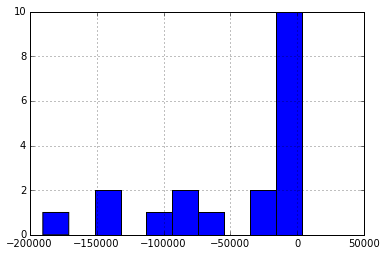

In [54]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-2000 >= 0 ].hist(bins = 10)
#plt.xlim(-20,20)

#### Pourcentage du sample à 0

In [55]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
#lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
#lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)==0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

50.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample presque à 0

In [56]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)<0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

90.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample > ou < à  0

In [57]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<0].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à 0 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0 ".format(round(prct2,2)*100)

23.0 % du sample à un lambda < à 0 
28.0 % du sample à un lambda > à 0 


In [58]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

2.0 % du sample à un lambda < à -0.01 
7.0 % du sample à un lambda > à 0.01 


In [59]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

25.0 % du sample à un lambda < à -0.01 
75.0 % du sample à un lambda > à 0.01 


#### Pourcentage du sample entre -20 et 20

In [60]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)>70].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda supérieur  à 70 ".format(round(prct1,2)*100)

1.0 % du sample à un lambda supérieur  à 70 


#### Lambda compensation négatif du à la décote ?

In [61]:
pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12).mean()

179.2312

In [62]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add("decote"))

In [63]:
filtre_unequal_decote = decote_monthly != decote_annual

In [64]:
lambda_compensation[filtre_unequal_decote].shape

(23034,)

(-20, 20)

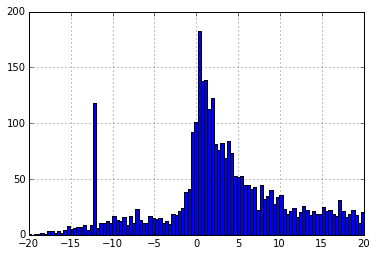

In [65]:
lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)].hist(bins = 500)
plt.xlim(-20,20)

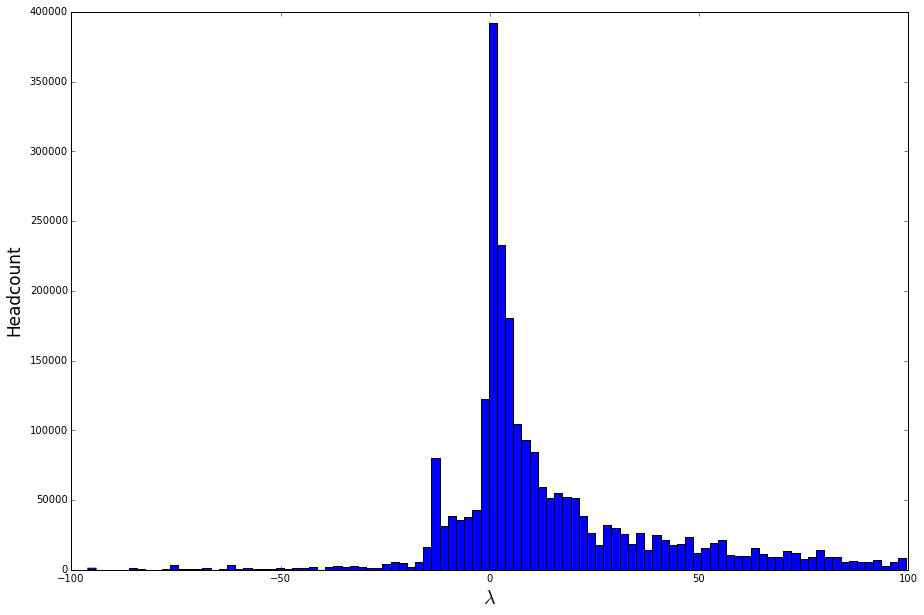

In [66]:
graph_filter = filtre_unequal_decote & (np.abs(lambda_compensation)>.1) & (np.abs(lambda_compensation)<100)


to_graph_foyer = lambda_compensation[graph_filter]
poids = pd.Series(weight_foyers)[graph_filter]

plt.figure(figsize=(15,10))
plt.hist(to_graph_foyer.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

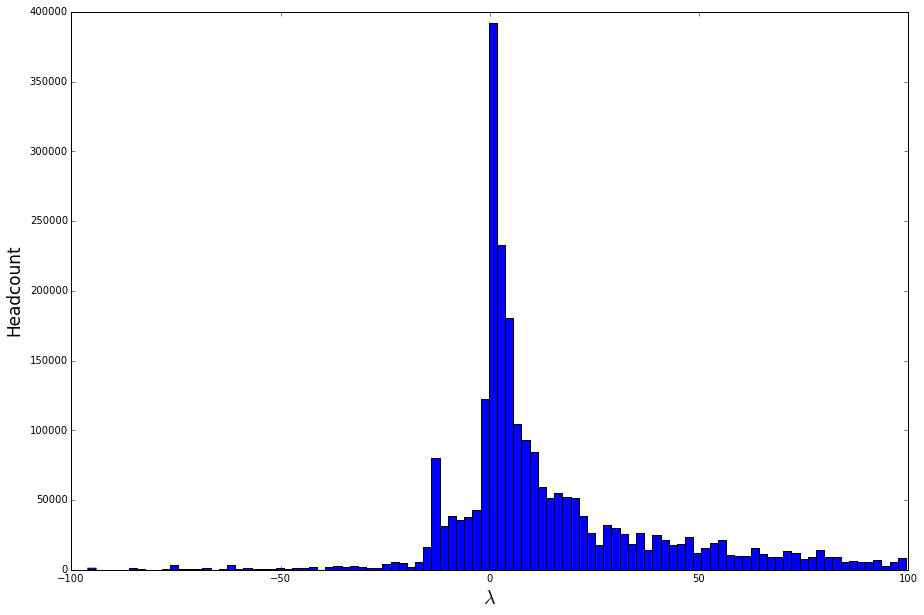

In [67]:
graph_filter = filtre_unequal_decote & (np.abs(lambda_compensation)>.1)&(np.abs(lambda_compensation)<100)


to_graph_foyer = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]
poids = pd.Series(weight_foyers)[
        filtre_unequal_decote&
        (np.abs(lambda_compensation)>.1)&
        (np.abs(lambda_compensation)<100)]

plt.figure(figsize=(15,10))
plt.hist(to_graph_foyer.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

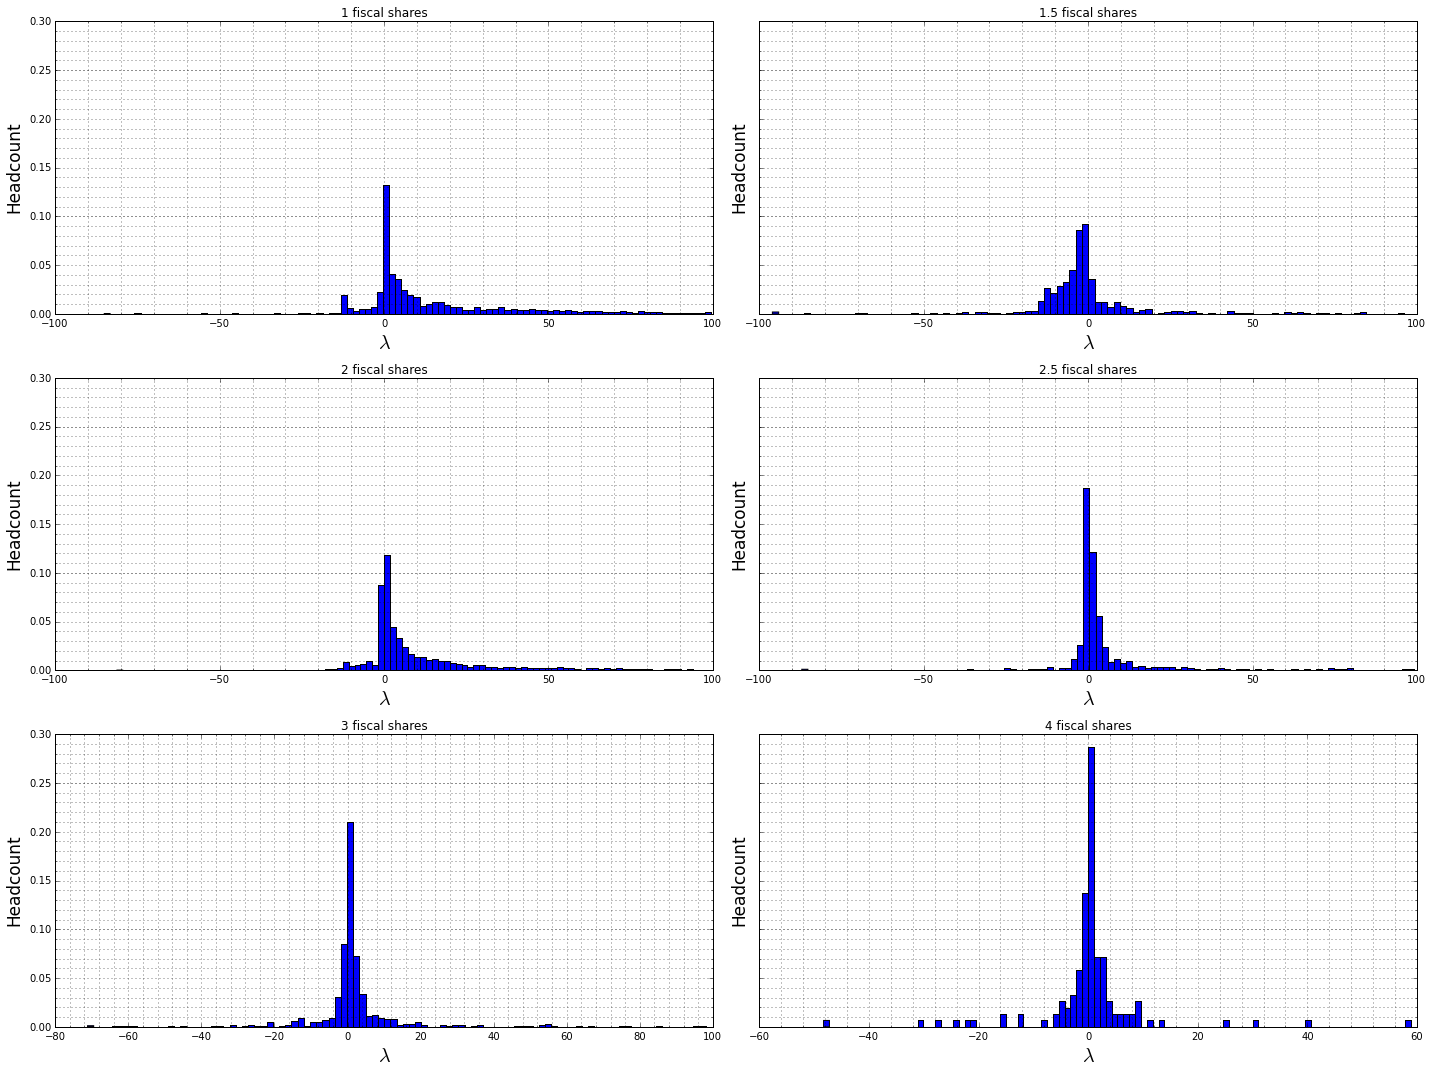

In [72]:
from matplotlib.ticker import AutoMinorLocator
nb_parts_list = [1,1.5,2,2.5,3,4]
graph_filter = (np.abs(lambda_compensation)>.1)&(np.abs(lambda_compensation)<100)

nb_subplots_lines = len(nb_parts_list)//2 + len(nb_parts_list)%2 

fig, ax = plt.subplots(nb_subplots_lines,2,sharey = True, figsize = (20, 15), tight_layout = True)
count = 0
for parts in nb_parts_list:
    graph_filter = (np.abs(lambda_compensation)>.001)&(np.abs(lambda_compensation)<100) & (simulation.calculate('nbptr') == parts)
    i = count//2
    j = count %2
    
    ax[i,j].hist(lambda_compensation[graph_filter].values, bins = 100, normed = True)#, weights = poids.values)
    ax[i,j].set_xlabel(r'$\lambda$',fontsize = 20 )
    ax[i,j].set_ylabel('Headcount',fontsize = 17)
    ax[i,j].set_title('{} fiscal shares'.format(parts))
    ax[i,j].xaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
    ax[i,j].yaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
    ax[i,j].grid(which = 'both')
    count +=1
plt.savefig("image_result_of_mensualisation/lambda_compensation_by_fiscal_shares.png")

In [73]:
lambda_compensation_menage = pd.Series(switch_entity('lambda_compensation', 'menage'))
graph_filter_menage =  (np.abs(lambda_compensation_menage)>.1)&(np.abs(lambda_compensation_menage)<100)

ValueError: weights should have the same shape as x

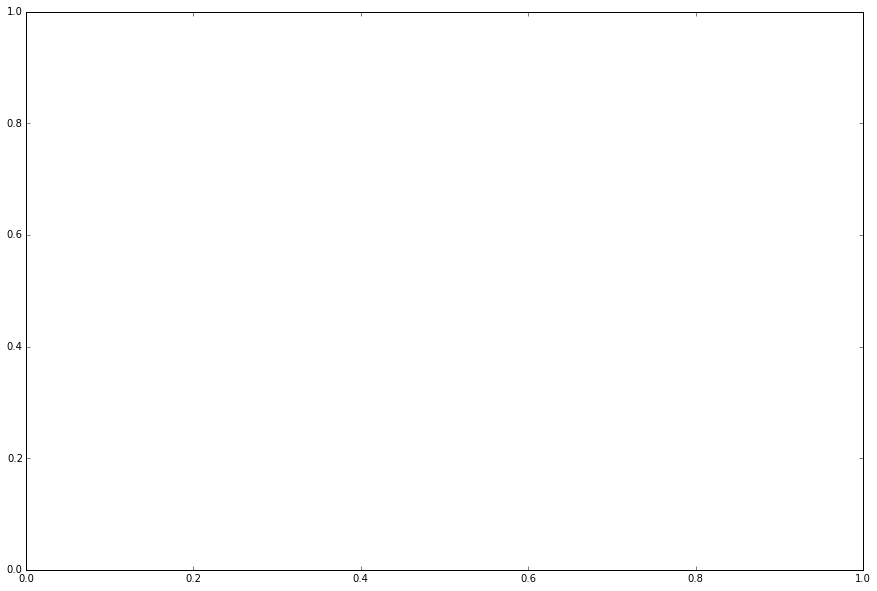

In [74]:
to_graph_foyer = lambda_compensation[graph_filter]
poids_menage = pd.Series(weight_menages)[graph_filter_menage]

plt.figure(figsize=(15,10))
plt.hist(to_graph_foyer.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

ValueError: weights should have the same shape as x

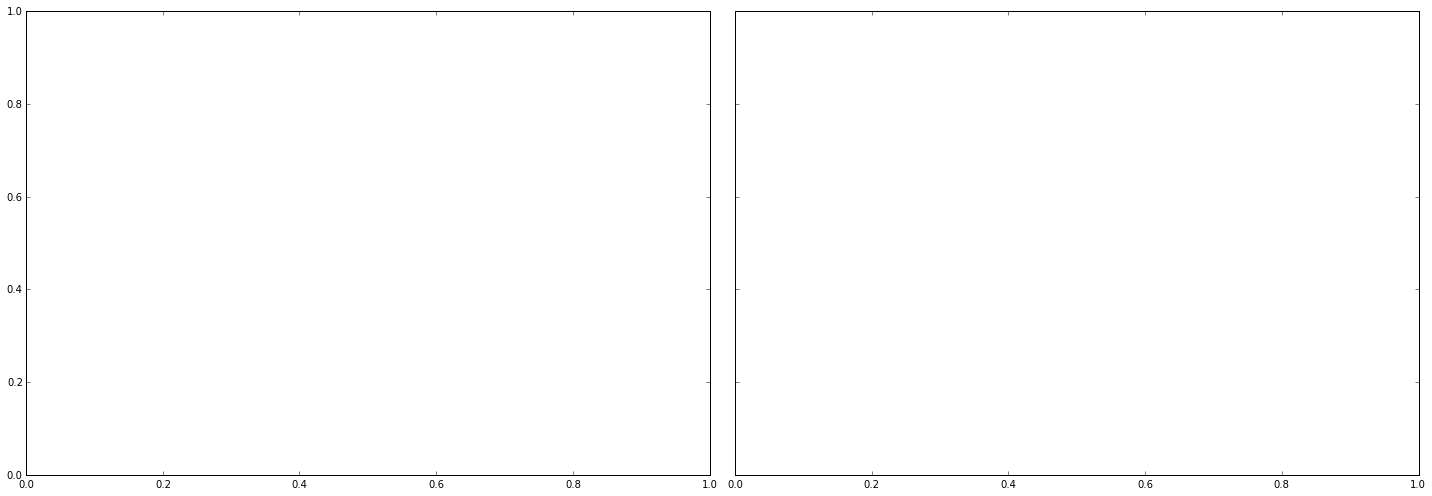

In [75]:

nb_minor_ticks = 5
fig, ax = plt.subplots(1,2,sharey = True, figsize = (20, 7), tight_layout = True)

to_graph_menage = lambda_compensation_menage[graph_filter_menage]
poids_menage = pd.Series(weight_menages)[graph_filter_menage]


ax[0].hist(to_graph_foyer.values, bins = 100, weights = poids.values)
ax[0].set_xlabel(r'$\lambda$',fontsize = 20 )
ax[0].set_ylabel('Headcount',fontsize = 17)
ax[0].set_title('Fiscal Household')
ax[0].xaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[0].grid(which = 'both')



ax[1].hist(to_graph_menage.values, bins = 100, weights = poids_menage.values)
ax[1].set_xlabel(r'$\lambda$',fontsize = 20)
#ax[1].set_ylabel('Headcount',fontsize = 17)
ax[1].set_title('Household')
ax[1].xaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[1].grid(which = 'both')

ValueError: weights should have the same shape as x

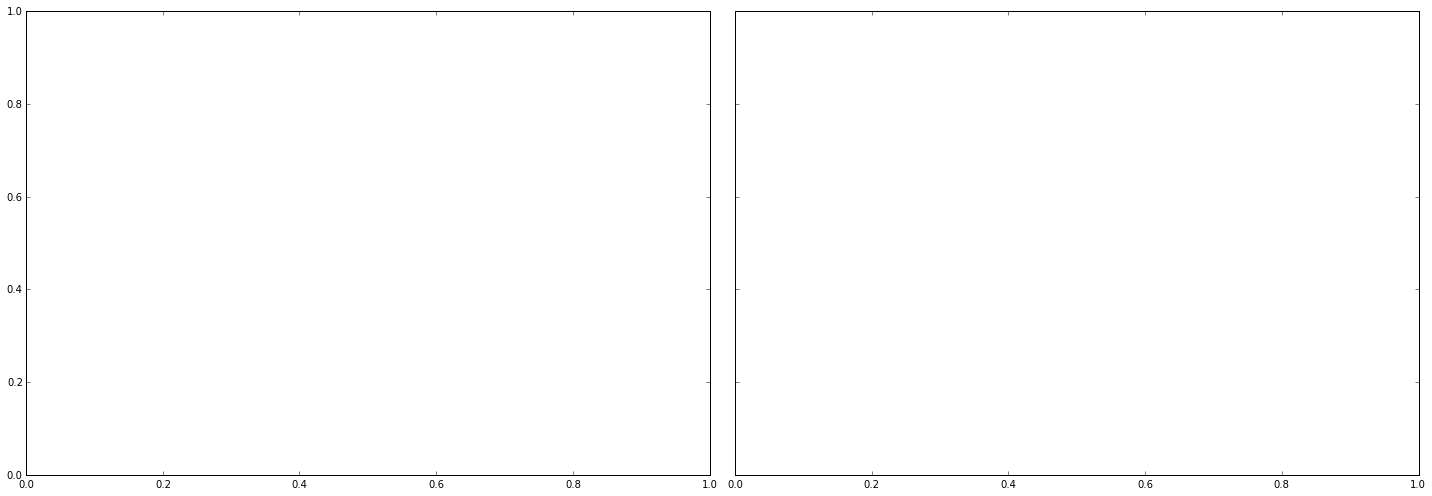

In [76]:
from matplotlib.ticker import AutoMinorLocator
nb_minor_ticks = 5
fig, ax = plt.subplots(1,2,sharey = True, figsize = (20, 7), tight_layout = True)

to_graph_menage = lambda_compensation_menage[graph_filter_menage]
poids_menage = pd.Series(weight_menages)[graph_filter_menage]
ax_nb = 0
ax[ax_nb].hist(to_graph_foyer.values, bins = 100,normed = True, weights = poids.values)
ax[ax_nb].set_xlabel(r'$\lambda$',fontsize = 20 )
ax[ax_nb].set_ylabel('Headcount',fontsize = 17)
ax[ax_nb].set_title('Fiscal Household')
ax[ax_nb].xaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[ax_nb].yaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[ax_nb].grid(which = 'both')


ax_nb = 1
ax[ax_nb].hist(to_graph_menage.values, bins = 100, normed = True ,weights = poids_menage.values)
ax[ax_nb].set_xlabel(r'$\lambda$',fontsize = 20)
#ax[1].set_ylabel('Headcount',fontsize = 17)
ax[ax_nb].set_title('Household')
ax[ax_nb].xaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[ax_nb].yaxis.set_minor_locator(AutoMinorLocator(nb_minor_ticks))
ax[ax_nb].grid(which = 'both')

In [77]:
to_graph_menage = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]

In [78]:
lambda_zero = pd.Series(lambda_compensation == 0 )
pd.Series(weight_foyers)[lambda_zero].sum()



16291830.0

In [79]:
index_exceptional_lambda = lambda_compensation[np.abs(lambda_compensation)>100].index

In [80]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df['decote_gain_fiscal_mensuel'] = df.decote_gain_fiscal_mensuel_times_12/12
df.iloc[index_exceptional_lambda]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation,decote_gain_fiscal_mensuel
4,252.503723,146.684967,-108.488831,-1942.908325,202.905991,12.223747
128,218.857468,0.000000,-209.427597,-3179.729248,170.195419,0.000000
234,238.712494,0.000000,-149.862518,-1831.854126,134.682770,0.000000
405,269.017517,2914.672363,0.400000,-25.741962,-784.258911,242.889359
468,-0.000000,0.000000,-425.854980,-5981.230957,156.542755,0.000000
588,133.102509,0.000000,-466.692474,-4444.631348,102.284203,0.000000
590,248.447495,0.000000,-120.657516,-5307.629395,515.870605,0.000000
1892,231.562500,0.000000,-171.312500,-5638.628906,382.971466,0.000000
2104,232.910004,0.000000,-167.269989,-3604.862549,246.613953,0.000000
2246,254.062500,0.000000,-103.812500,-4504.193848,508.653381,0.000000


In [81]:
survey_scenario.simulation.calculate("irpp_mensuel","2009-08")[4]

-971.45416

In [82]:
df["difference"] = np.abs(df.decote_gain_fiscal- df.decote_gain_fiscal_mensuel)>0.01
df[lambda_compensation == -12].difference.value_counts()

True     102
False      5
dtype: int64

In [83]:
df.shape

(59874, 7)

In [84]:
df[lambda_compensation == -12][['decote_gain_fiscal', 'decote_gain_fiscal_mensuel', 'lambda_compensation',"irpp",'irpp_mensuel' ]]

,decote_gain_fiscal,decote_gain_fiscal_mensuel,lambda_compensation,irpp,irpp_mensuel
743,157.952423,239.030014,-12,-392.142731,-0
1391,257.068756,273.102509,-12,-94.793732,-0
1666,175.872437,262.359161,-12,-338.382690,-0
2221,262.664978,244.310043,-12,-78.005035,-0
2560,211.432495,207.514969,-12,-231.702515,-0
3334,197.922501,82.885002,-12,-272.232483,-0
3482,231.988785,257.262482,-12,-170.033646,-0
3983,137.402496,0.000000,-12,-453.792511,-0
4108,254.827515,0.000000,-12,-101.517456,-0
4374,252.522507,0.000000,-12,-108.432480,-0


In [85]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
df.lambda_compensation[df.lambda_compensation< -70] = 0

In [86]:
df[np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)+1>0].shape

(59874, 5)

(-20, 20)

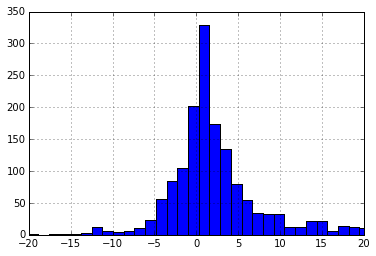

In [87]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-1<0)
                      & (np.abs(df.lambda_compensation)>0.1)].hist(bins = 100)
plt.xlim(-20,20)

In [88]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)].mean()

7.6328607

In [89]:
df[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
7,-0.000000,223.836288,-2966.810059,-7234.854004,17.263165
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
38,76.113708,42.886242,-576.658875,-897.256348,6.671482
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
67,-0.000000,136.980972,-950.567383,-1734.394775,9.895069
74,133.872498,0.000000,-464.382507,-1367.037476,23.325294
85,16.202515,0.000000,-817.392456,-5112.797852,63.060120
101,220.742493,0.000000,-203.772522,-754.381226,32.424900
157,49.032501,59.248749,-718.902466,-741.326172,0.374299
159,83.599976,0.000000,69.500000,-210.421295,-48.331738


In [90]:
df[df.lambda_compensation<-1]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
219,39.092499,209.385391,-748.722534,-93.510429,-10.501281
273,44.823730,218.486313,-578.528809,-57.541183,-10.806465
372,-0.000000,-0.000000,-1407.664917,-1190.384888,-1.852259
450,-0.000000,0.000000,-1409.734985,272.399994,-14.318733
554,-0.000000,-0.000000,-1104.777588,-1007.197327,-1.059908
722,152.197510,232.167496,-73.407471,166.502502,-39.218346
743,157.952423,239.030014,-392.142731,-0.000000,-12.000000


In [91]:
df[df.lambda_compensation<-1][df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12]

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
1886,118.345001,0.000000,171.535004,-707.201294,-61.473377
2200,163.817490,0.000000,1253.000000,-258.154144,-14.472346
2221,262.664978,244.310043,-78.005035,-0.000000,-12.000000
2245,182.545105,27.949804,110.000000,-166.983917,-30.216427
2433,147.207520,131.401535,147.000000,131.180328,-1.291402
2560,211.432495,207.514969,-231.702515,-0.000000,-12.000000
3170,6.792513,0.000000,191.800003,-564.493103,-47.317608
3334,197.922501,82.885002,-272.232483,-0.000000,-12.000000
3444,260.589996,0.000000,909.200012,302.976807,-8.001186


## Compensated irpp

In [92]:
print max(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))
print min(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))

0.09375
-0.03125


In [93]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [94]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [95]:
df[df.compensated_irpp_mensuel - df.irpp<2][['irpp', 'compensated_irpp_mensuel', 'irpp_mensuel']]

,irpp,compensated_irpp_mensuel,irpp_mensuel
0,0.000000,0.000000,-7.903255
1,0.000000,0.000000,-0.000000
2,0.000000,0.000000,-0.000000
3,-1378.829712,-1378.829712,-1378.829956
4,-108.488831,-108.488831,-1942.908325
5,-792.612549,-792.612549,-792.612366
6,-9160.150391,-9160.150391,-9160.149414
7,-2966.810059,-2966.809814,-7234.854004
8,0.000000,0.000000,-0.000000
9,0.000000,0.000000,-0.000000


In [96]:
print survey_scenario.compute_aggregate('compensated_irpp_mensuel')
print survey_scenario.compute_aggregate('irpp')

-48038862125.8
-48038862065.7


In [97]:
impot_mensuel_times_12 = survey_scenario.simulation.calculate("irpp_mensuel", period)*12
lambda_compensation = survey_scenario.simulation.calculate("lambda_compensation", period.this_year)



compensated_irpp = impot_mensuel_times_12/(12 + lambda_compensation)

In [98]:
compensated_irpp[743]

nan

In [99]:
(survey_scenario.simulation.calculate("irpp", period.this_year) == 0)*0

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
compensated_irpp = (survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * 0 + \
                ~(survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * np.nan_to_num(compensated_irpp) ;compensated_irpp[[4,743]]

array([-108.48883057,    0.        ])

In [101]:
compensated_irpp = (
                (survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * #Condition
                (survey_scenario.simulation.calculate("irpp", period.this_year)/12) # on répartit sur l'année
            ) + ~(survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * compensated_irpp #condition opposée
compensated_irpp[[4,743]]

array([-108.48883057,  -32.67856216])

In [102]:
df[df.lambda_compensation.isnull()]

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation


In [103]:
survey_scenario.simulation.calculate_add('irpp')

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [104]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

In [105]:
lambda_compensation = survey_scenario.simulation.calculate('lambda_compensation')
np.all(lambda_compensation != np.nan)
lambda_compensation != np.nan
hello = lambda_compensation[1]
assert np.all(np.isfinite(lambda_compensation))


In [106]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp'], ['irpp_mensuel','compensated_irpp_mensuel'])['foyers_fiscaux']

sal_pen_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,59774,59775,59776,59777,59778,59779,59780,59781,59782,59783,59784,59785,59786,59787,59788,59789,59790,59791,59792,59793,59794,59795,59796,59797,59798,59799,59800,59801,59802,59803,59804,59805,59806,59807,59808,59809,59810,59811,59812,59813,59814,59815,59816,59817,59818,59819,59820,59821,59822,59823,59824,59825,59826,59827,59828,59829,59830,59831,59832,59833,59834,59835,59836,59837,59838,59839,59840,59841,59842,59843,59844,59845,59846,59847,59848,59849,59850,59851,59852,59853,59854,59855,59856,59857,59858,59859,59860,59861,59862,59863,59864,59865,59866,59867,59868,59869,59870,59871,59872,59873
irpp,0.000000,0,0,-1378.829712,-108.488831,-792.612549,-9160.150391,-2966.810059,0,0,153.500000,-2335.952637,0,-1309.255005,0,-2104.827637,0.000000,166.152588,-4151.707031,-3237.300049,-2124.675049,-877.314941,-601.944092,737.799988,0.000000,-1072.575317,-1089.632202,-433.722321,0,0.00000,0,-1132.755005,-1087.487549,0,0.000000,778.040283,-79.077332,-5260.950195,-576.658875,-1171.852295,-157.122513,-1710.030518,-8168.149902,-502.418640,-7868.875000,-7178.475098,-7609.375000,0,-700.632874,0,0,0,0,0,0.0000,-557.202698,-219.863785,-347.900146,0.00000,-100.774826,-1554.069702,0,-1177.890015,0,-1053.290039,-176.052505,-25070.472656,-950.567383,0.000000,-7382.575195,-1490.895020,-902.614990,-956.515015,0.000000,-464.382507,-19810.775391,-306.282501,-839.862549,-2150.909424,0.000000,-2422.667725,128.607910,221.765015,-781.379395,0,-817.392456,-1687.875000,-2443.069336,-712.655029,-1361.430542,-504.814941,-450.965210,0.000000,0,-244.102661,-607.182739,0,-1016.015015,-2660.685059,0,...,0.0000,-601.302246,0.000000,-1093.915039,0,-474.908691,-948.814697,-2816.445068,-1445.395020,0,-1058.574951,-2052.189941,-595.650024,-267.612518,-1248.135010,-499.992493,-4005.529785,-1531.915039,0,-319.692688,-202.414978,-321.545105,0.00000,-3714.446777,-2004.694702,-687.770264,0,-748.354553,-1434.970215,-424.152496,-244.002533,-163.542511,0.000000,-202.538803,-597.724976,-9831.699219,-257.890350,0,-1735.875000,-4654.606934,720.587402,0,0,0,0,-414.822540,0,-551.364990,0.000000,-1313.714966,0,-694.752075,0,0,0,-1803.330322,-2510.689941,-122.678955,0,-837.510071,-881.647339,0,-1013.949707,0,-2144.870117,-1179.814941,714.760010,-820.122070,-6603.650879,-476.045013,0,-994.734985,-1435.174683,-699.807495,-322.212524,0,0,-1994.087402,0,0,0,0,0,0,-2146.514893,-15008.900391,-315.072510,0,-7257.776367,-2652.369873,-3179.347412,0.000000,-2050.929932,-198.942520,-1824.654785,-12667.373047,0,0.000000,0,0
compensated_irpp_mensuel_2009-01,0.000000,0,0,-114.902489,0.000000,-66.051056,-763.345947,-4.560170,0,0,-47.092911,-194.662720,0,1.160107,0,-175.402283,0.000000,13.846048,-345.975586,-269.775024,-177.056259,5.842635,-50.162003,61.483326,0.000000,-89.381279,-90.802673,-36.143524,0,0.00000,0,-94.396263,-90.623962,0,0.000000,64.836700,-6.589777,-438.412476,3.267014,-97.654358,-13.093544,-142.502563,-680.679138,-41.868217,-655.739502,-598.206360,-634.114563,0,-58.386074,0,0,0,0,0,0.0000,-46.433563,-18.321983,-28.991678,0.00000,-8.397902,-129.505783,0,0.000000,0,-87.774170,-14.671043,-2089.205811,-12.089419,0.000000,-615.214478,-124.241272,-75.217918,-79.709579,0.000000,0.000000,-1650.897705,-25.523539,-69.988548,-179.242477,0.000000,-201.888992,10.717326,18.480419,-65.114952,0,0.000000,-187.541641,-203.589127,-59.387913,-113.452560,-42.067917,-37.580429,0.000000,0,-20.341888,-50.598564,0,-84.667923,-221.723755,0,...,0.0000,-50.108521,0.000000,-91.159599,0,-39.575726,-79.067886,-234.703735,-160.599442,0,-88.214569,-171.015808,-49.637497,-22.301043,-104.011261,-41.666039,-11.911106,0.000000,0,-26.641056,0.000000,-26.795427,0.00000,-309.537201,-167.057907,-57.314194,0,-62.362877,-119.580856,1.13

In [107]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

## Utility annalysis 

In [108]:
survey_scenario.compute_aggregate("utility_ir_annuel") #TODO : find why Nan

-118944.15783934249

In [109]:
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009')).mean()

-0.0044554
-0.00445516
-0.00445331
-0.0044516


In [110]:
u_ir_m_rsa_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009'))
u_c_ir = pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009'))
u_ir_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009'))
u_ir_a = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009'))


In [111]:
print u_ir_m_rsa_m.mean(),1/u_ir_m_rsa_m.mean()
print u_c_ir.mean(),1/u_c_ir.mean()
print u_ir_m.mean(),1/u_ir_m.mean()
print u_ir_a.mean(),1/u_ir_a.mean()

-0.0044516 -224.638572143
-0.00445331 -224.552154687
-0.00445516 -224.458859069
-0.0044554 -224.446730468


In [112]:
print u_c_ir.describe()
print u_ir_m.describe()
print u_ir_a.describe()

count    49016.000000
mean        -0.004453
std          0.000805
min         -0.006125
25%         -0.004992
50%         -0.004492
75%         -0.003917
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004455
std          0.000806
min         -0.006125
25%         -0.004994
50%         -0.004493
75%         -0.003918
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004455
std          0.000805
min         -0.006125
25%         -0.004993
50%         -0.004494
75%         -0.003918
max         -0.000247
dtype: float64


In [113]:
print 1/u_c_ir.describe()
print 1/u_ir_m.describe()
print 1/u_ir_a.describe()

count       0.000020
mean     -224.552155
std      1242.042369
min      -163.268352
25%      -200.316287
50%      -222.630290
75%      -255.328988
max     -4056.595651
dtype: float64
count       0.000020
mean     -224.458859
std      1241.348550
min      -163.268352
25%      -200.250770
50%      -222.548431
75%      -255.215053
max     -4056.595651
dtype: float64
count       0.000020
mean     -224.446730
std      1241.878155
min      -163.268352
25%      -200.284149
50%      -222.520805
75%      -255.215053
max     -4056.595651
dtype: float64


(0, 200)

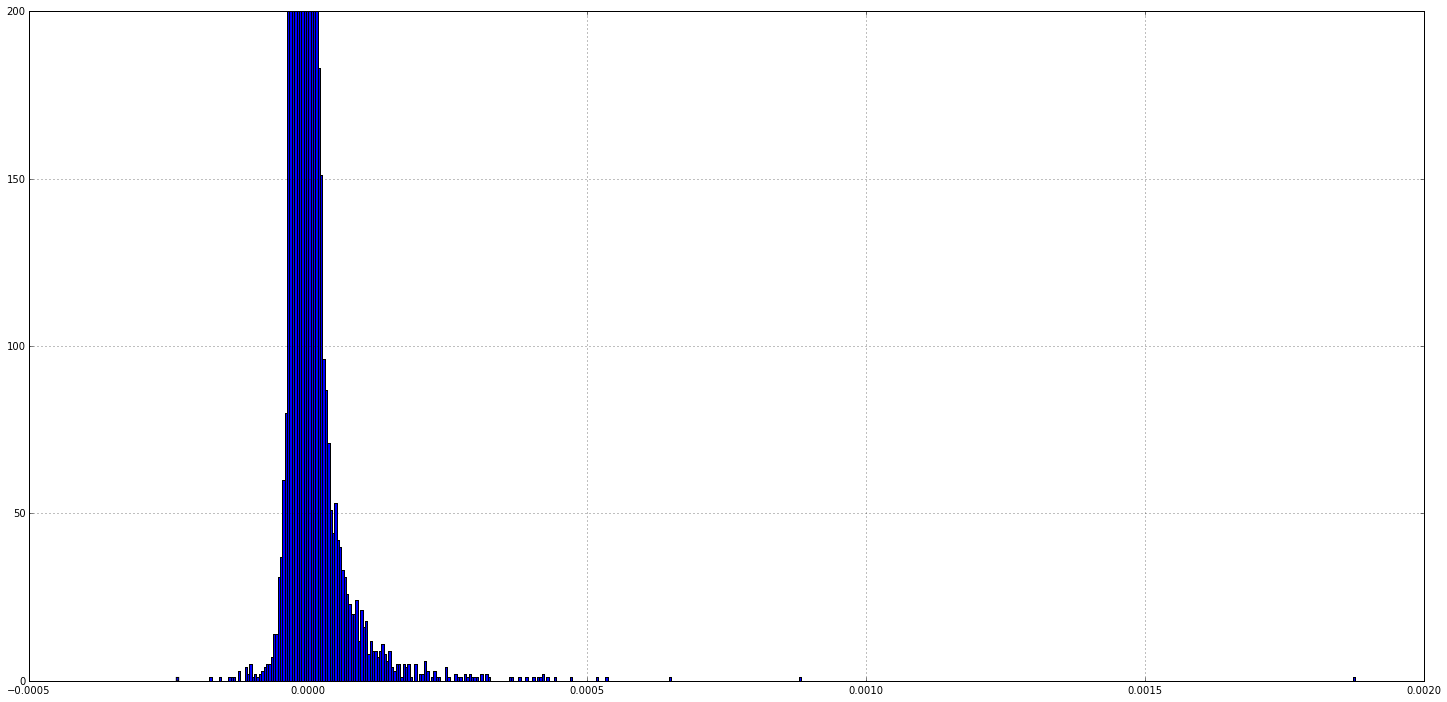

In [114]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [115]:
((u_ir_m - u_ir_a)<-0.0000001).value_counts()

False    42295
True      6721
dtype: int64

(0, 200)

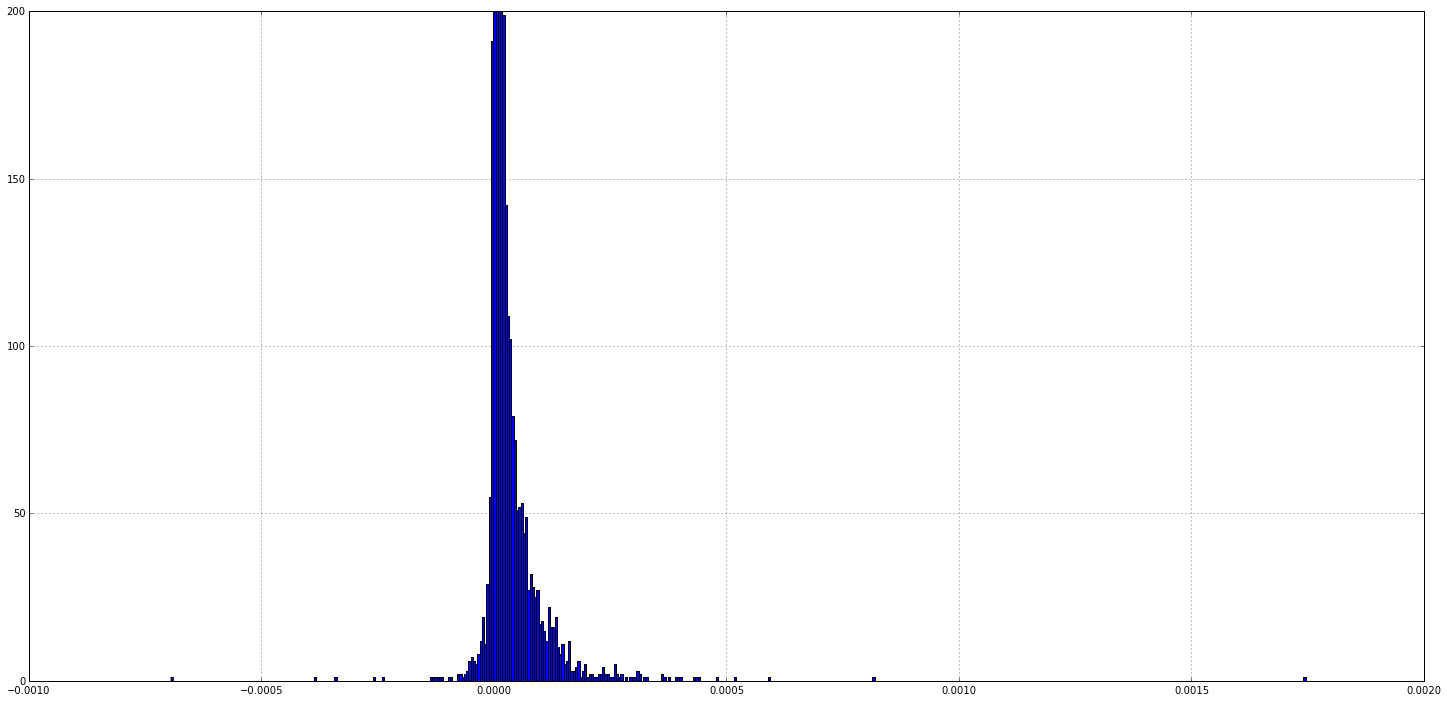

In [116]:
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [117]:
((u_c_ir - u_ir_a)<-0.0000001).value_counts()

False    48399
True       617
dtype: int64

##### Graphs with weights

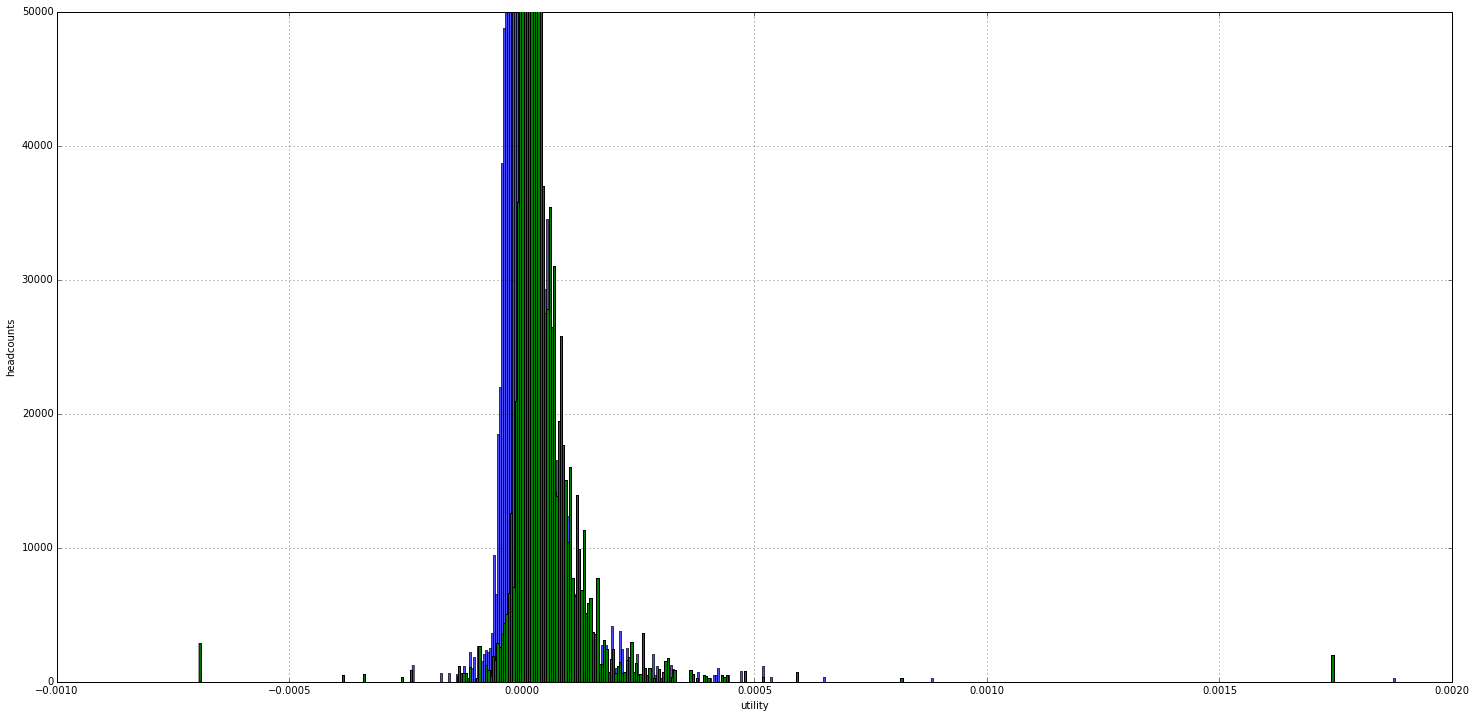

In [118]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12), zorder=1, alpha = 0.7, weights = weight_menages,)
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages,zorder=10, alpha = 1)
plt.ylim(0,5*10**4)
plt.xlabel('utility')
plt.ylabel('headcounts')

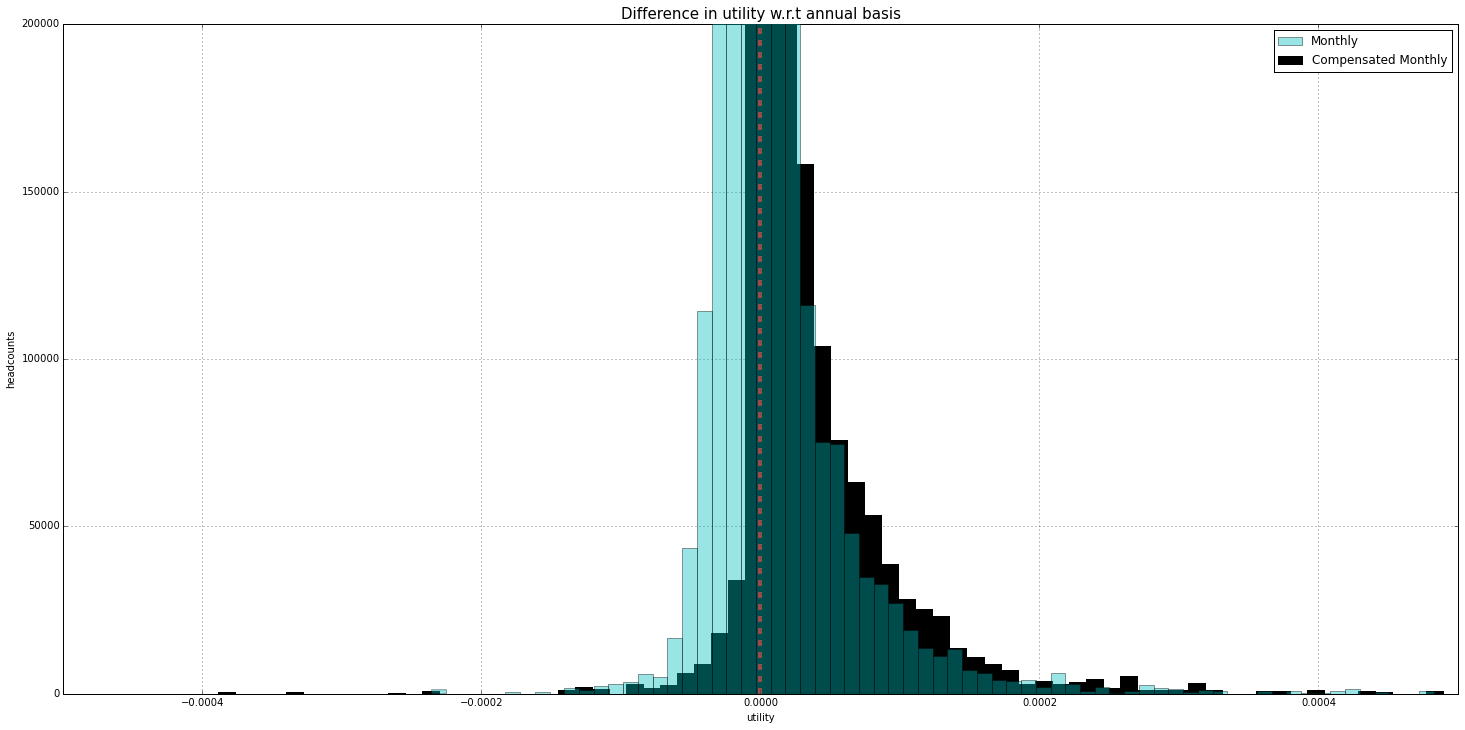

In [119]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,20*10**4)
plt.xlim(-0.0005, 0.0005)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

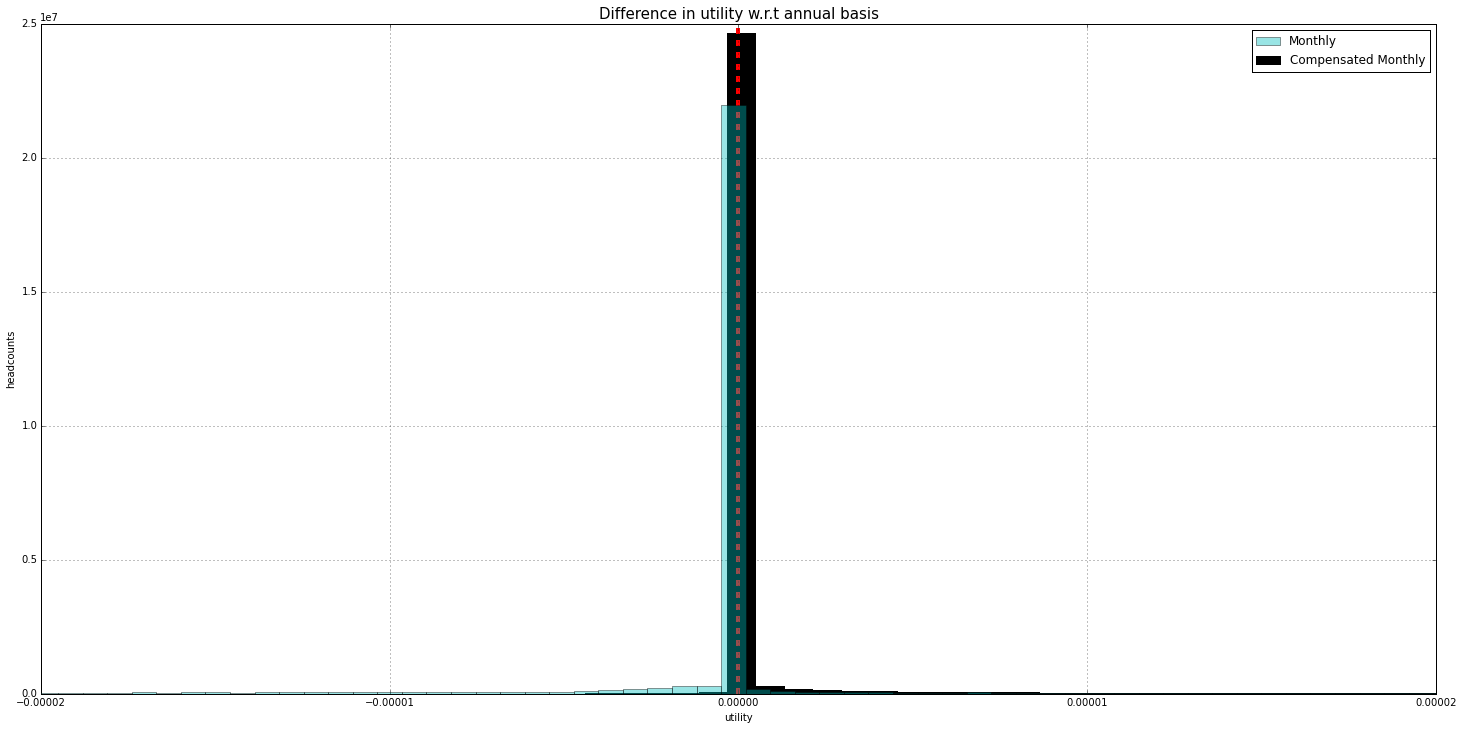

In [120]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
#plt.ylim(0,70*10**5)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [121]:
weight_menages = pd.Series(weight_menages)

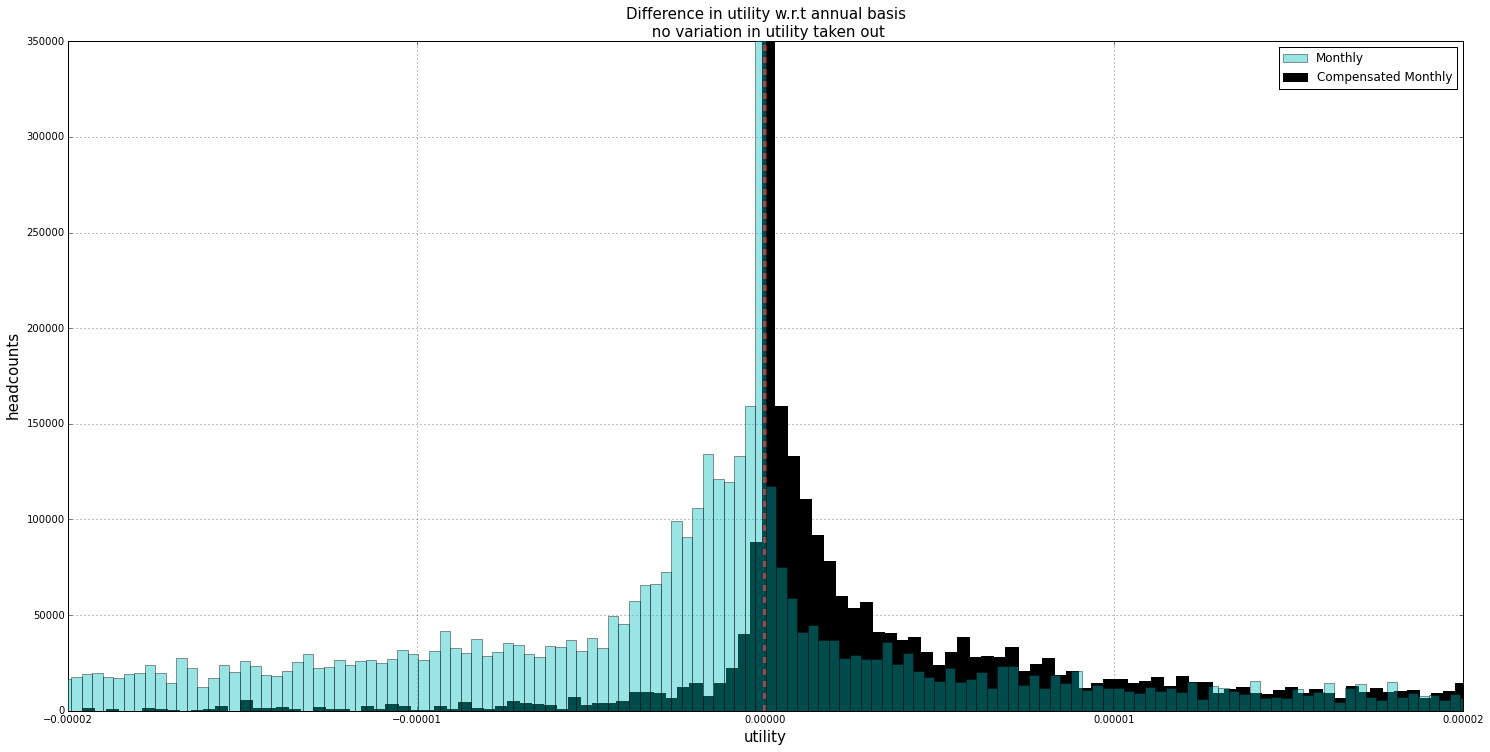

In [122]:
execute_time_consuming_graph = True
if execute_time_consuming_graph == True : 

    hist1 = ((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_ir_m - u_ir_a))!=0].values, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
    hist2 = ((u_c_ir - u_ir_a))[((u_c_ir - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_c_ir - u_ir_a))!=0].values,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

    plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
    plt.ylim(0,35*10**4)
    plt.xlim(-0.00002, 0.00002)
    plt.legend()
    plt.title("Difference in utility w.r.t annual basis \n no variation in utility taken out", size = 15)
    plt.xlabel('utility', size = 15)
    plt.ylabel('headcounts', size = 15)

In [123]:
outliers = pd.Series(np.abs(((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0])>0.00002).value_counts(normalize = True); outliers

False    0.75417
True     0.24583
dtype: float64

In [124]:
"This graph represent {}% of the tax-unit with varying utility, {}% of that sample are over 0.0002 utility points variation".format(outliers[0], outliers[1])

'This graph represent 0.754169623847% of the tax-unit with varying utility, 0.245830376153% of that sample are over 0.0002 utility points variation'

In [125]:
pd.Series(weight_menages).shape

(49016,)

In [126]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

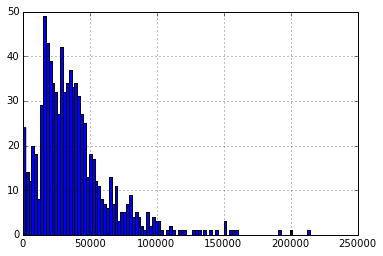

In [127]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel'))[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [128]:
pay_irpp = (simulation.calculate('irpp') > 0)
print pay_irpp.shape
pd.value_counts(cast_array_from_entity_to_role(pay_irpp, 'foyer_fiscal', roles = [0]))

(59874,)


0    109945
1      2414
dtype: int64

In [129]:
decote_mensuel = simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12
decote = simulation.calculate_add("decote_gain_fiscal")


has_decote_difference = (np.abs(decote -decote_mensuel)>0.1).astype(int)
has_decote_difference = cast_array_from_entity_to_role(has_decote_difference, 'foyer_fiscal', roles = [0])

nb_decote_diff_menage = sum_array_by_entity(has_decote_difference, 'menage')

print pd.value_counts(nb_decote_diff_menage)


utility_loss = (u_c_ir - u_ir_a)<-0.00000001
pd.value_counts(nb_decote_diff_menage[utility_loss])

#utility_loss = condition((u_c_ir - u_ir_a)<-0.00000001)
#utility_loss = cast_array_from_entity_to_role(utility_loss, roles = [0])


0    41315
1     7328
2      355
3       18
dtype: int64


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


1    48329
0      687
dtype: int64

In [130]:
revdisp_loss = (simulation.calculate_add('revdisp_mensuel_compensated_ir_mensuel') - simulation.calculate_add('revdisp_mensuel_annuel')) < -1
#no_decote_or_payment_threshold_concern =  
good_rev_trav = switch_entity('rfr', 'menage')/switch_entity('nbptr', 'menage') > 20000
pd.value_counts(pd.Series(revdisp_loss)[good_rev_trav])

False    9602
True      225
dtype: int64

In [131]:
dico = {} #bizare, qu'est-ce qu'il se passe exactement ?
a = 7
for month in range(1,13):
    dico[month] = zip(pd.Series(simulation.calculate("revdisp_mensuel_compensated_ir_mensuel", period = "2009-{}".format(month)))[good_rev_trav&revdisp_loss][a:a+1], 
                      pd.Series(simulation.calculate_add('revdisp_mensuel_compensated_ir_mensuel') - simulation.calculate_add('revdisp_mensuel_annuel'))[good_rev_trav&revdisp_loss][a:a+1],
                      pd.Series(switch_entity('irpp', 'famille'))[good_rev_trav&revdisp_loss][a:a+1],
                      
                     
                     )

/usr/local/lib/python2.7/site-packages/pandas/core/internals.py:179: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 55306 but corresponding boolean dimension is 49016
  return self.values[slicer]
/usr/local/lib/python2.7/site-packages/pandas/core/index.py:1087: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 55306 but corresponding boolean dimension is 49016
  result = getitem(key)


In [132]:
dico

{1: [(3596.9731, -711.02344, -838.78497314453125)],
 2: [(3596.9731, -711.02344, -838.78497314453125)],
 3: [(3596.9731, -711.02344, -838.78497314453125)],
 4: [(3596.9731, -711.02344, -838.78497314453125)],
 5: [(3596.9731, -711.02344, -838.78497314453125)],
 6: [(3596.9731, -711.02344, -838.78497314453125)],
 7: [(3596.9731, -711.02344, -838.78497314453125)],
 8: [(3596.9731, -711.02344, -838.78497314453125)],
 9: [(3596.9731, -711.02344, -838.78497314453125)],
 10: [(412.77856, -711.02344, -838.78497314453125)],
 11: [(12.704166, -711.02344, -838.78497314453125)],
 12: [(12.704166, -711.02344, -838.78497314453125)]}

In [133]:
good_rev_trav.shape

(49016,)

In [134]:
pd.Series(nb_decote_diff_menage.astype('bool'))[utility_loss == True].value_counts(normalize = True) #Parmis les ménages ayant eu une perte d'utilité 56% ont eu une différence de décote.

True     0.564774
False    0.435226
dtype: float64

In [135]:
pd.Series(nb_decote_diff_menage.astype('bool'))[utility_loss == True].value_counts(normalize = True) #Parmis les ménages ayant eu une perte d'utilité 56% ont eu une différence de décote.

True     0.564774
False    0.435226
dtype: float64

In [136]:
(nb_decote_diff_menage.astype('bool')*weight_menages.values).sum()/weight_menages.sum()

0.15574227292934023

In [137]:
nb_decote_diff_menage

array([ 1.,  0.,  0., ...,  0.,  1.,  0.])

In [138]:
pd.Series(utility_loss)[nb_decote_diff_menage.astype('bool')].value_counts(normalize = True) #Parmis les ménages ayant eu une différence de décote 5% ont eu une perte d'utilité

False    0.949617
True     0.050383
dtype: float64

In [139]:
pd.Series(nb_decote_diff_menage.astype('bool'))[utility_loss == True].value_counts()

True     388
False    299
dtype: int64

In [140]:
u_c_ir.shape

(49016,)

In [141]:
pd.value_counts(sum_array_by_entity(has_decote_difference, 'menage'))

0    41315
1     7328
2      355
3       18
dtype: int64

In [142]:
ax = ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]).value_counts( normalize = True)*100).plot(kind = "bar",)
plt.ylim((0,100))

labels = ["{}%".format(np.round(i,2)) for i in ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.0000001)]).value_counts( normalize = True)*100) ] #0.000001 pour éviter les erreurs d'arrondis.
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

IndexingError: Unalignable boolean Series key provided

In [ ]:
survey_scenario.simulation.persons.count

In [ ]:
is_decote_different = pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]

In [ ]:
#TODO for famille and check if it coorrespond to the 46.43%
below_collection_thrshld = np.zeros(weight_foyers.shape[0], dtype=bool)
for month in range(1,13):
    irpp_mensuel = pd.Series(survey_scenario.simulation.calculate("irpp_mensuel", '2009-{}'.format(month)))
    below_collection_thrshld += (irpp_mensuel>1) & (irpp_mensuel<5.16)
    

In [ ]:
pd.Series(below_collection_thrshld).value_counts()

In [ ]:
np.array([True, False])+np.array([True, True])

In [ ]:
#Qui sont les gagnants ? :


In [ ]:
is_decote_different[is_decote_different==False]

In [ ]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

In [ ]:
(pd.Series(decote!= decote_mensuel)[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [ ]:
revdisp[(u_c_ir>=u_ir_a)]

In [ ]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

## Qui sont les gagnants ?

In [ ]:
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)

In [ ]:
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
                     *weight_menages).sum()
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)
                      *weight_menages).sum()

In [ ]:
np.mean(
    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
    )

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 200, label = "Paying less on monthly basis")
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 65, color= 'r', label = "Paying more on monthly basis")
plt.xlim(0,50000)
plt.title("paying more or less")

###### Weighted

In [ ]:
from openfisca_utils import make_ready_to_use_simulation
from openfisca_core import rates
simulation = make_ready_to_use_simulation.make_ready_to_use_simulation(2009,False)
rbg_test_case = simulation.calculate('rbg')
irpp_test_case = simulation.calculate('irpp')
marginal_rate = rates.marginal_rate(irpp_test_case, rbg_test_case)-1
to_change = pd.Series(marginal_rate)[marginal_rate>1].index
#to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index
marginal_rate[to_change] = marginal_rate[to_change+1]
plt.plot(marginal_rate)

In [ ]:
to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index


In [ ]:
pd.Series(marginal_rate)[marginal_rate>1]

In [ ]:
np.mean(survey_scenario.simulation.calculate("rbg"))

In [ ]:
np.array([True,True,False]) *np.array([2,3,4])

In [ ]:
pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel") - survey_scenario.simulation.calculate_add("revdisp_mensuel_compensated_ir_mensuel")>1))

In [ ]:


weights1 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
weights2 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1]

fig, ax1 = plt.subplots(figsize=(20, 10))


ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [(survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel"))>1], bins = 400, label = "Paying more on monthly basis", weights= weights1)
ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [(survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel"))<-1], bins = 130, color= 'r', label = "Paying less on monthly basis",weights= weights2)


ax1.set_xlim(0,50000)
ax2 = plt.twinx()
ax2.plot(rbg_test_case[1:],marginal_rate, 'k', label = "marginal tax rate")
ax2.set_xlim(0,50000)
ax2.legend()
ax1.legend(bbox_to_anchor=(0.22, 1))
ax1.grid(which = 'both')
ax1.text(11000,500000, u"minimum wage", weight = 'bold',)
ax2.set_ylabel("marginal tax rate")
ax1.set_xlabel("Gross global income divided by fiscal shares")
ax1.set_ylabel("number of taxunit")
#plt.title("")


In [ ]:
-(100 -  110)

In [ ]:
survey_scenario.simulation.calculate_add("irpp_mensuel").mean()

### Gains monetaires

#### Same annalysis with benefits

In [ ]:
survey_scenario.compute_aggregate("rsa_socle_majore_mensualise")

In [ ]:
survey_scenario.compute_aggregate("rsa_non_majore")

In [ ]:
pd.Series(survey_scenario.simulation.calculate("rsa_eligibilite_tns", "2009-01")).value_counts()

# Utilitarian monetary gains

In [ ]:
monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [ ]:
((monetary_gain_ir.sum(0)/10)*12)/10**9

Gains moyens par ménages.

In [ ]:
monetary_gain_ir = pd.Series(monetary_gain_ir)
monetary_gains_ir_0 = monetary_gain_ir[monetary_gain_ir != 0]
monetary_gains_ir_0.hist(bins = 500, weights = (pd.Series(weight_menages)[monetary_gain_ir != 0]).values)
plt.xlim(-10000,10000)

In [ ]:
print pd.Series(monetary_gain_ir<-10).value_counts()
print pd.Series(monetary_gain_ir>10).value_counts()
pd.Series(monetary_gain_ir)[monetary_gain_ir>10].shape

In [ ]:
month = 7
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
gain[np.abs(gain)>1].mean()


In [ ]:
 diff_in_income = pd.Series(
    np.abs(survey_scenario.simulation.calculate("revdisp_mensuel_annuel", "2009-{}".format(month))
          - survey_scenario.simulation.calculate("revdisp_mensuel_compensated_ir_mensuel", "2009-{}".format(month)))>1
    )

In [ ]:
weight_menages.sum(0)

In [ ]:
#monetary_gain.sum(0)/10**9

#### Non compensated

In [ ]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [ ]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [ ]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

In [ ]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += np.mean(
    (survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))*weight_menages
    )

In [ ]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

In [ ]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,12):
    u_monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [ ]:
(u_monetary_gain_ir.sum(0))/10**9

In [ ]:
month = 6
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
mean_gain = gain[np.abs(gain)>1].mean()
print('{} gain on average'.format(mean_gain))

In [ ]:
u_monetary_gain = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain +=np.mean(
        pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
               )
(((u_monetary_gain_ir/10)*12)/10**9).mean()  

#### mean monetary equivalent utility gain for each month

In [ ]:
u_money_gain = np.zeros(weight_menages.shape[0])
mean_gain = np.zeros(1)
for month in range(1,13):
    u_money_gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
        )
    mean_gain += (u_money_gain[np.abs(u_money_gain)>1]).mean()
print('{} gain on average'.format(mean_gain[0]))

In [ ]:
#mean_gain = (u_gain[np.abs(u_gain)>1]).mean()

#### mean monetary equivalent utility gain over the year

In [ ]:
u_annuelle = pd.Series(np.zeros(weight_menages.shape[0]))
u_mensuelle = pd.Series(np.zeros(weight_menages.shape[0]))
mean_gain = np.zeros(1)
for month in range(1,13):
    u_annuelle += pd.Series(
        survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        )
    u_mensuelle += pd.Series(survey_scenario.simulation.calculate("utility_ir_mensuel", "2009-{}".format(month)) 
        )
eq_money_u_annuelle = np.exp((np.log(-u_annuelle))/-.87)
eq_money_u_mensuelle = np.exp((np.log(-u_mensuelle))/-.87)
impact_filter = (u_annuelle != u_mensuelle)

print('{} gain on average'.format(eq_money_u_mensuelle.mean() - eq_money_u_annuelle.mean()))
print('{} gain on average for concerned taxunits'.format(eq_money_u_mensuelle[impact_filter].mean() - eq_money_u_annuelle[impact_filter].mean()))

In [ ]:
eq

In [ ]:
u_gain.describe()

#### Compensated

In [ ]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [ ]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += (
    survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [ ]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

In [ ]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += np.mean(
    (survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))*weight_menages
    )

In [ ]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

In [ ]:
month = 7
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
mean_gain = gain[np.abs(gain)>1].mean()
print('{} gain on average'.format(mean_gain))

In [ ]:
u_monetary_gain = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain +=np.mean(
        pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
               )
(((u_monetary_gain_ir/10)*12)/10**9).mean()  

#### mean monetary equivalent utility gain over the year

In [ ]:
u_annuelle = pd.Series(np.zeros(weight_menages.shape[0]))
u_mensuelle = pd.Series(np.zeros(weight_menages.shape[0]))
mean_gain = np.zeros(1)
for month in range(1,13):
    u_annuelle += pd.Series(
        survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        )
    u_mensuelle += pd.Series(survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) 
        )
eq_money_u_annuelle = np.exp((np.log(-u_annuelle))/-.87)
eq_money_u_mensuelle = np.exp((np.log(-u_mensuelle))/-.87)
impact_filter = (u_annuelle != u_mensuelle)

print('{} gain on average'.format(eq_money_u_mensuelle.mean() - eq_money_u_annuelle.mean()))
print('{} gain on average for concerned taxunits'.format(eq_money_u_mensuelle[impact_filter].mean() - eq_money_u_annuelle[impact_filter].mean()))


In [ ]:
u_annuelle = pd.Series(np.zeros(weight_menages.shape[0]))
u_mensuelle = pd.Series(np.zeros(weight_menages.shape[0]))
mean_gain = np.zeros(1)
for month in range(1,13):
    u_annuelle += pd.Series(a
                            `
        survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        )
    u_mensuelle += pd.Series(survey_scenario.simulation.calculate("utility_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) 
        )
eq_money_u_annuelle = np.exp((np.log(-u_annuelle))/-.87)
eq_money_u_mensuelle = np.exp((np.log(-u_mensuelle))/-.87)
impact_filter = (u_annuelle != u_mensuelle)

print('{} gain on average'.format(eq_money_u_mensuelle.mean() - eq_money_u_annuelle.mean()))
print('{} gain on average for concerned taxunits'.format(eq_money_u_mensuelle[impact_filter].mean() - eq_money_u_annuelle[impact_filter].mean()))


In [ ]:
u_mensuelle

### RSA+IR

In [ ]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [ ]:
monetary_gain_ir_rsa = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir_rsa += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [ ]:
((monetary_gain_ir_rsa.sum(0)/10)*12)/10**9

## Gains et perte passage à la retraite.

In [ ]:
print survey_scenario.simulation.persons.simulation.entity_by_key_plural

In [ ]:
coucou.entity.simulation

In [ ]:
c = np.zeros(1)
a = np.array([1,2,3])
b = np.array([True,True,False])
c += a[b]; c

In [ ]:
is_retired = np.zeros(weight_individus.shape[0])
is_active = np.zeros(weight_individus.shape[0])
is_inactive = np.zeros(weight_individus.shape[0])
for month in range(1,13):
    is_retired += survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))>0
    is_active += survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month))>0
    is_inactive += (survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month)) + survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))) == 0

In [ ]:
(pd.Series(is_retired + is_active + is_inactive).hist(bins= 12))

In [ ]:
is_retired = np.zeros(weight_individus.shape[0])
is_active = np.zeros(weight_individus.shape[0])
is_inactive = np.zeros(weight_individus.shape[0])
is_retire_active = np.zeros(weight_individus.shape[0])

for month in range(1,13):
    retraite_imposable = survey_scenario.simulation.compute("retraite_imposable", "2009-{}".format(month))
    salaire_imposable = survey_scenario.simulation.compute("salaire_imposable", "2009-{}".format(month))
    is_retired += retraite_imposable.array >0
    is_active += salaire_imposable.array > 0 
    is_retire_active += (retraite_imposable.array >0) & (salaire_imposable.array > 0 )
    is_inactive += (retraite_imposable.array == 0) & (salaire_imposable.array == 0 )
    

In [ ]:
is_retire_is_active_not_retire_active = ((is_retire_active == 0)
                                         & (is_active>0)
                                         & (is_inactive >0)
                                         )

In [ ]:
survey_scenario.simulation.tax_benefit_system.Variable.formula_class.sum_by_entity(retraite_imposable)

In [ ]:
survey_scenario.simulation.tax_benefit_system.Variable.formula_class.sum_by_entity('h')

In [ ]:
 type(class_name.encode('utf-8'), (Reform.DatedVariable,), definitions_by_name)

In [ ]:
pd.Series(is_retire_is_active_not_retire_active).value_counts()

In [ ]:
(pd.Series(is_retired + is_active + is_inactive)).value_counts()

In [ ]:
passage_a_la_retraite = pd.Series(is_retired) & pd.Series(is_not_retired)

## Revdisp over the year

## Annual IR Basis

In [143]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,ppe,impo,rev_cap
1,80446056,3401369.75,27179322,8116128.5,388890.5625,-7378242.666667,146923.083333
2,80205280,3339581.25,27200762,4782682.5,388890.5625,-7378242.666667,146923.083333
3,80154912,3433212.50,27403234,5027160.0,388890.5625,-7378242.666667,146923.083333
4,80183488,3356610.50,27280964,8150251.0,388890.5625,-7378242.666667,146923.083333
5,80182728,3462323.00,27561876,5730149.0,388890.5625,-7378242.666667,146923.083333
6,80186344,3621052.50,27925554,5686628.0,388890.5625,-7378242.666667,146923.083333
7,80155752,3779776.50,28094176,5689500.5,388890.5625,-7378242.666667,146923.083333
8,80345952,3978757.75,28543968,5609103.0,388890.5625,-7378242.666667,146923.083333
9,80677472,4363786.00,29311400,5559448.5,388890.5625,-7378242.666667,146923.083333
10,81388208,4971175.00,28707408,5916309.0,388890.5625,-7378242.666667,146923.083333


#### With weight

In [144]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel',]:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
    

revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo,rev_cap
1,46.035288,1.988781,12.544919,4.394287,-4.00459,0.000147
2,45.911349,1.966999,12.577170,2.571006,-4.00459,0.000147
3,45.915476,2.084441,12.740929,2.702532,-4.00459,0.000147
4,45.947659,1.934130,12.562599,4.484328,-4.00459,0.000147
5,45.926885,1.995026,12.733947,3.108409,-4.00459,0.000147
6,45.875387,2.120168,12.955677,3.086955,-4.00459,0.000147
7,45.898869,2.211393,13.022996,3.098778,-4.00459,0.000147
8,45.964801,2.337075,13.255434,3.051979,-4.00459,0.000147
9,46.157049,2.538842,13.616544,3.026573,-4.00459,0.000147
10,46.501451,2.785263,13.339886,3.198544,-4.00459,0.000147


In [145]:
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel &     impo &   rev\_cap \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &      4.394287 & -4.00459 &  0.000147 \\
2  &          45.911349 &           1.966999 &    12.577170 &      2.571006 & -4.00459 &  0.000147 \\
3  &          45.915476 &           2.084441 &    12.740929 &      2.702532 & -4.00459 &  0.000147 \\
4  &          45.947659 &           1.934130 &    12.562599 &      4.484328 & -4.00459 &  0.000147 \\
5  &          45.926885 &           1.995026 &    12.733947 &      3.108409 & -4.00459 &  0.000147 \\
6  &          45.875387 &           2.120168 &    12.955677 &      3.086955 & -4.00459 &  0.000147 \\
7  &          45.898869 &           2.211393 &    13.022996 &      3.098778 & -4.00459 &  0.000147 \\
8  &          45.964801 &           2.337075 &    13.255434 &      3.051979 & -4.00459 &  0.000147 \\
9  &          46.157049 &         

In [ ]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_annual.png")

## Monthly Basis

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

### With weight

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)

revdisp_oy.index = range(1,13)
revdisp_oy/10**9

In [ ]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_monthly.png")

In [ ]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

## Compensated Monthly Basis

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

### With weight

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

In [ ]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_comp_monthly.png")

In [ ]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

## Compensated Rsa monthly

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel_rsa_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

### With weight

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel_rsa_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

In [ ]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_rsa_ir_comp_monthly.png")

In [ ]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['rev_trav_mensuel', 'pen_mensuel', 'chomage_imposable', 'pen_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['psoc_mensuel'] = - pd.Series(np.sum(survey_scenario.simulation.calculate('psoc_mensuel', "2009-{}".format(month))))
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

In [ ]:

undecompsed_revdisp = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    temp['revdisp_mensuel_annuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('revdisp_mensuel_annuel', "2009-{}".format(month))))
    undecompsed_revdisp = undecompsed_revdisp.append(temp, ignore_index=True)
    

In [ ]:
undecompsed_revdisp.index = range(1,13)

In [ ]:
df1 = pd.DataFrame({'revdisp_mensuel_annuel':revdisp_oy.sum(1).values}) 
df1.index = range(1,13)
(df1 - undecompsed_revdisp)/10**9

In [ ]:
undecompsed_revdisp.index = np.arange(-0.5,11.5,1)

In [ ]:
undecompsed_revdisp.index = np.arange(-0.5,11.5, 1) #TODO: pouruoi une différence ?
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.2, figsize=(15,9) )
#ax = fig.add_subplot(111)
plt.bar(undecompsed_revdisp.index, undecompsed_revdisp.values, color = 'k', alpha = 0.4)
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)

plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)

In [ ]:
undecompsed_revdisp.index = np.arange(-0.5,11.5, 1) #TODO: pouruoi une différence ?
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)

In [ ]:
undecompsed_revdisp


## Monthly IR basis 

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe', 'impo_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
        temp['psoc_mensuel'] = - pd.Series(np.sum(survey_scenario.simulation.calculate('psoc_mensuel', "2009-{}".format(month))))
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy
revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [ ]:
plt.close()
plt.figure()

#### With weight

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy.index = range(1,13)

revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

In [ ]:
revdisp_oy.index = range(1,13)
revdisp_oy.index = range(1,13)

revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [ ]:
revdisp_oy/10**9

In [ ]:
print (revdisp_oy/10**9).to_latex()

## Monthly IR compensated

In [ ]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe', 'compensated_impo_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy
revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("rev_trav_mensuel", "2009-{}".format(month)))

In [ ]:
'a'

In [ ]:
revdisp_oy.sum(0).plot(kind = 'bar', color = 'b')

#### By income type

In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')
plt.ylim(8*10**7)


In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("pen_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("psoc_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("ppe", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("impo_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [ ]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [ ]:
survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))

# END

### Taux d'intérêt

In [ ]:
def revdisp_tx(var = None, taux = None):
    revdisp_i = 0
    for month in range(0,12):
        monthly_taux = ((1+taux)**(1/12)) 
        revdisp_i += (
            survey_scenario.simulation.calculate(var, survey_scenario.simulation.period.offset(month, 'month').this_month) 
            / (monthly_taux)**month 
                      )
    return revdisp_i


In [ ]:
revdisp_tx('revdisp_mensuel_ir_mensuel', 1.6)

In [ ]:
survey_scenario.simulation.period.offset(2, 'month').this_month